# CODICE FINALE!

In [3]:
# Importare le librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Caricamento del dataset
file_path = '../Datasets/atp_tennis.csv'
data = pd.read_csv(file_path)

# Esplorazione iniziale del dataset
print("Anteprima del dataset:")
print(data.head())
print("\nInformazioni sul dataset:")
print(data.info())

Anteprima del dataset:
                           Tournament    Country        Date         Series  \
0  Australian Hardcourt Championships  Australia  2000-01-03  International   
1  Australian Hardcourt Championships  Australia  2000-01-03  International   
2  Australian Hardcourt Championships  Australia  2000-01-03  International   
3  Australian Hardcourt Championships  Australia  2000-01-03  International   
4  Australian Hardcourt Championships  Australia  2000-01-03  International   

     Court Surface      Round  Best of        Player_1       Player_2  \
0  Outdoor    Hard  1st Round        3      Dosedel S.    Ljubicic I.   
1  Outdoor    Hard  1st Round        3      Clement A.     Enqvist T.   
2  Outdoor    Hard  1st Round        3       Escude N.  Baccanello P.   
3  Outdoor    Hard  1st Round        3  Knippschild J.     Federer R.   
4  Outdoor    Hard  1st Round        3     Fromberg R.  Woodbridge T.   

        Winner  Rank_1  Rank_2  Pts_1  Pts_2  Odd_1  Odd_2     

In [4]:
# Pulizia preliminare: rimuovere righe con NaN o 0 nelle colonne numeriche
numeric_columns = ['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2']  # Specificare le colonne numeriche rilevanti
data[numeric_columns] = data[numeric_columns].replace(0, np.nan)  # Convertire gli zeri in NaN
data_cleaned = data.dropna(subset=numeric_columns)  # Rimuovere righe con NaN

# Verifica dopo la pulizia
print("\nDati puliti: righe rimosse dove le colonne numeriche avevano NaN o 0")
print(f"Righe originali: {len(data)}, Righe dopo pulizia: {len(data_cleaned)}")
print("\nAnteprima dei dati puliti:")
print(data_cleaned.head())



Dati puliti: righe rimosse dove le colonne numeriche avevano NaN o 0
Righe originali: 64166, Righe dopo pulizia: 48513

Anteprima dei dati puliti:
         Tournament Country        Date         Series    Court Surface  \
15652  Swedish Open  Sweden  2005-07-04  International  Outdoor    Clay   
15653  Swedish Open  Sweden  2005-07-04  International  Outdoor    Clay   
15654  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   
15655  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   
15656  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   

           Round  Best of       Player_1        Player_2          Winner  \
15652  1st Round        3     Robredo T.       Tabara M.      Robredo T.   
15653  1st Round        3  Ryderstedt M.  Vinciguerra A.  Vinciguerra A.   
15654  1st Round        3     Youzhny M.      Haehnel J.      Youzhny M.   
15655  1st Round        3      Dlouhy L.    Ferrero J.C.    Ferrero J.C.   
15656  1st Round     

In [5]:
# Identificare le colonne numeriche
numeric_columns = ['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2']  # Specificare le colonne numeriche rilevanti

# Contare i valori non validi prima della pulizia
invalid_counts_before = data[numeric_columns].isna().sum() + (data[numeric_columns] == 0).sum()
print("\nValori non validi (NaN o 0) prima della pulizia:")
print(invalid_counts_before)

# Pulizia preliminare: rimuovere righe con NaN o 0 nelle colonne numeriche
data[numeric_columns] = data[numeric_columns].replace(0, np.nan)  # Convertire gli zeri in NaN
data_cleaned = data.dropna(subset=numeric_columns)  # Rimuovere righe con NaN

# Contare i valori non validi dopo la pulizia
invalid_counts_after = data_cleaned[numeric_columns].isna().sum() + (data_cleaned[numeric_columns] == 0).sum()
print("\nValori non validi (NaN o 0) dopo la pulizia:")
print(invalid_counts_after)

# Verifica dopo la pulizia
print("\nDati puliti: righe rimosse dove le colonne numeriche avevano NaN o 0")
print(f"Righe originali: {len(data)}, Righe dopo pulizia: {len(data_cleaned)}")
print("\nAnteprima dei dati puliti:")
print(data_cleaned.head())


Valori non validi (NaN o 0) prima della pulizia:
Rank_1       14
Rank_2       12
Pts_1     15652
Pts_2     15653
dtype: int64

Valori non validi (NaN o 0) dopo la pulizia:
Rank_1    0
Rank_2    0
Pts_1     0
Pts_2     0
dtype: int64

Dati puliti: righe rimosse dove le colonne numeriche avevano NaN o 0
Righe originali: 64166, Righe dopo pulizia: 48513

Anteprima dei dati puliti:
         Tournament Country        Date         Series    Court Surface  \
15652  Swedish Open  Sweden  2005-07-04  International  Outdoor    Clay   
15653  Swedish Open  Sweden  2005-07-04  International  Outdoor    Clay   
15654  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   
15655  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   
15656  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   

           Round  Best of       Player_1        Player_2          Winner  \
15652  1st Round        3     Robredo T.       Tabara M.      Robredo T.   
15653  1st Roun

In [6]:
# Verifica della colonna "Score"
print("\nControllo della colonna 'Score':")

# Valori mancanti o vuoti
invalid_score_count = data['Score'].isna().sum() + (data['Score'].str.strip() == "").sum()
print(f"Numero di valori non validi (NaN o vuoti): {invalid_score_count}")

# Controllo del formato corretto
import re

# Definizione di un pattern regex per verificare punteggi nel formato valido (esempio: 6-4 6-3)
score_pattern = r'^(\d+-\d+\s?)+$'
invalid_format_count = data[~data['Score'].str.match(score_pattern, na=False)].shape[0]
print(f"Numero di punteggi con formato non valido: {invalid_format_count}")

# Rimuovere righe con punteggi non validi o NaN
data_cleaned = data_cleaned[data_cleaned['Score'].notna()]  # Rimuovi NaN
data_cleaned = data_cleaned[data_cleaned['Score'].str.strip() != ""]  # Rimuovi stringhe vuote
data_cleaned = data_cleaned[data_cleaned['Score'].str.match(score_pattern)]  # Rimuovi formati non validi

# Verifica dopo la pulizia
print(f"Righe dopo la pulizia della colonna 'Score': {len(data_cleaned)}")
print("\nAnteprima dei dati puliti:")
print(data_cleaned.head())


Controllo della colonna 'Score':
Numero di valori non validi (NaN o vuoti): 0
Numero di punteggi con formato non valido: 0
Righe dopo la pulizia della colonna 'Score': 48513

Anteprima dei dati puliti:
         Tournament Country        Date         Series    Court Surface  \
15652  Swedish Open  Sweden  2005-07-04  International  Outdoor    Clay   
15653  Swedish Open  Sweden  2005-07-04  International  Outdoor    Clay   
15654  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   
15655  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   
15656  Swedish Open  Sweden  2005-07-05  International  Outdoor    Clay   

           Round  Best of       Player_1        Player_2          Winner  \
15652  1st Round        3     Robredo T.       Tabara M.      Robredo T.   
15653  1st Round        3  Ryderstedt M.  Vinciguerra A.  Vinciguerra A.   
15654  1st Round        3     Youzhny M.      Haehnel J.      Youzhny M.   
15655  1st Round        3      Dlouhy L.  

In [7]:
# Feature: Ranking massimo e medio
data_cleaned['Max_Rank_1'] = data_cleaned.groupby('Player_1')['Rank_1'].transform('min')
data_cleaned['Max_Rank_2'] = data_cleaned.groupby('Player_2')['Rank_2'].transform('min')
data_cleaned['Avg_Rank_1'] = data_cleaned.groupby('Player_1')['Rank_1'].transform('mean')
data_cleaned['Avg_Rank_2'] = data_cleaned.groupby('Player_2')['Rank_2'].transform('mean')

max_rank = pd.concat([
    data_cleaned[['Player_1', 'Max_Rank_1']].rename(columns={'Player_1': 'Player', 'Max_Rank_1': 'Max_Rank'}),
    data_cleaned[['Player_2', 'Max_Rank_2']].rename(columns={'Player_2': 'Player', 'Max_Rank_2': 'Max_Rank'})
])

avg_rank = pd.concat([
    data_cleaned[['Player_1', 'Avg_Rank_1']].rename(columns={'Player_1': 'Player', 'Avg_Rank_1': 'Avg_Rank'}),
    data_cleaned[['Player_2', 'Avg_Rank_2']].rename(columns={'Player_2': 'Player', 'Avg_Rank_2': 'Avg_Rank'})
])

max_rank = max_rank.groupby('Player')['Max_Rank'].min().reset_index()
avg_rank = avg_rank.groupby('Player')['Avg_Rank'].mean().reset_index()

In [8]:
# Feature: Punti massimi e medi
max_points = pd.concat([
    data_cleaned[['Player_1', 'Pts_1']].rename(columns={'Player_1': 'Player', 'Pts_1': 'Max_Points'}),
    data_cleaned[['Player_2', 'Pts_2']].rename(columns={'Player_2': 'Player', 'Pts_2': 'Max_Points'})
])

avg_points = pd.concat([
    data_cleaned[['Player_1', 'Pts_1']].rename(columns={'Player_1': 'Player', 'Pts_1': 'Avg_Points'}),
    data_cleaned[['Player_2', 'Pts_2']].rename(columns={'Player_2': 'Player', 'Pts_2': 'Avg_Points'})
])

max_points = max_points.groupby('Player')['Max_Points'].max().reset_index()
avg_points = avg_points.groupby('Player')['Avg_Points'].mean().reset_index()

In [9]:
# Calcolare il totale delle partite giocate
total_matches = pd.concat([data_cleaned['Player_1'], data_cleaned['Player_2']]).value_counts()
total_matches = total_matches.rename('Total_Matches').reset_index()
total_matches = total_matches.rename(columns={'index': 'Player'})

In [10]:
# Calcolare il numero totale di vittorie
total_wins = data_cleaned['Winner'].value_counts().rename('Total_Wins').reset_index()
total_wins = total_wins.rename(columns={'index': 'Player'})

In [11]:
# Rinominare la colonna 'Winner' in 'Player' nel dataframe 'total_wins'
total_wins = total_wins.rename(columns={'Winner': 'Player'})

# Calcolare la percentuale di vittorie
win_percentage = total_wins.merge(total_matches, on='Player', how='left')
win_percentage['Win_Percentage'] = win_percentage['Total_Wins'] / win_percentage['Total_Matches'] * 100

print("\nCalcolo della percentuale di vittorie (Win_Percentage):")
print(win_percentage.head())


Calcolo della percentuale di vittorie (Win_Percentage):
        Player  Total_Wins  Total_Matches  Win_Percentage
0  Djokovic N.        1016           1201       84.596170
1     Nadal R.         923           1096       84.215328
2   Federer R.         830            979       84.780388
3    Murray A.         666            917       72.628135
4    Ferrer D.         594            874       67.963387


In [12]:
# Feature: Performance per superficie
surface_wins_1 = pd.crosstab(data_cleaned['Player_1'], data_cleaned['Surface'])
surface_wins_2 = pd.crosstab(data_cleaned['Player_2'], data_cleaned['Surface'])
surface_wins_combined = surface_wins_1.add(surface_wins_2, fill_value=0)
surface_wins_combined.columns = [f"Wins_{surface}" for surface in surface_wins_combined.columns]

# Calcolo del totale delle partite giocate
total_matches = pd.concat([data_cleaned['Player_1'], data_cleaned['Player_2']]).value_counts()
total_matches = total_matches.rename('Total_Matches').reset_index()

# Unire i dati delle vittorie per superficie con il totale delle partite
player_stats = surface_wins_combined.merge(total_matches, left_index=True, right_on='index', how='left')
player_stats = player_stats.rename(columns={'index': 'Player'})

# Calcolare le percentuali di vittorie per superficie
for surface in ['Clay', 'Hard', 'Grass']:
    col_name = f"Wins_{surface}"
    if col_name in player_stats.columns:
        player_stats[f"Win_Percentage_{surface}"] = player_stats[col_name] / player_stats['Total_Matches']

print("\nStatistiche di performance per superficie (anteprima):")
print(player_stats.head())


Statistiche di performance per superficie (anteprima):
      Wins_Clay  Wins_Grass  Wins_Hard         Player  Total_Matches  \
1048        2.0         0.0        0.0       Hajek J.              2   
169       113.0         0.0       81.0     Acasuso J.            194   
1313        0.0         0.0        1.0  Adaktusson J.              1   
743         5.0         0.0        0.0   Agamenone F.              5   
419         0.0         4.0       33.0      Agassi A.             37   

      Win_Percentage_Clay  Win_Percentage_Hard  Win_Percentage_Grass  
1048             1.000000             0.000000              0.000000  
169              0.582474             0.417526              0.000000  
1313             0.000000             1.000000              0.000000  
743              1.000000             0.000000              0.000000  
419              0.000000             0.891892              0.108108  


In [13]:
# Feature: Prestazioni nei tornei principali
# Calcolare vittorie nei Grand Slam e Masters 1000 separatamente
data_cleaned['Grand_Slam_Win_1'] = data_cleaned.apply(
    lambda row: 1 if row['Series'] == 'Grand Slam' and row['Winner'] == row['Player_1'] else 0, axis=1
)
data_cleaned['Grand_Slam_Win_2'] = data_cleaned.apply(
    lambda row: 1 if row['Series'] == 'Grand Slam' and row['Winner'] == row['Player_2'] else 0, axis=1
)

data_cleaned['Masters_1000_Win_1'] = data_cleaned.apply(
    lambda row: 1 if row['Series'] == 'Masters 1000' and row['Winner'] == row['Player_1'] else 0, axis=1
)
data_cleaned['Masters_1000_Win_2'] = data_cleaned.apply(
    lambda row: 1 if row['Series'] == 'Masters 1000' and row['Winner'] == row['Player_2'] else 0, axis=1
)

# Aggregare i dati per ogni giocatore
grand_slam_wins = data_cleaned.groupby('Player_1')['Grand_Slam_Win_1'].sum() + \
                  data_cleaned.groupby('Player_2')['Grand_Slam_Win_2'].sum()
masters_1000_wins = data_cleaned.groupby('Player_1')['Masters_1000_Win_1'].sum() + \
                    data_cleaned.groupby('Player_2')['Masters_1000_Win_2'].sum()

# Creare un dataframe con le vittorie aggregate
major_wins = pd.DataFrame({
    'Player': grand_slam_wins.index,
    'Grand_Slam_Wins': grand_slam_wins.values,
    'Masters_1000_Wins': masters_1000_wins.values
})

print("\nStatistiche delle vittorie nei tornei principali (Grand Slam e Masters 1000):")
print(major_wins.head())


Statistiche delle vittorie nei tornei principali (Grand Slam e Masters 1000):
          Player  Grand_Slam_Wins  Masters_1000_Wins
0       Hajek J.              NaN                NaN
1     Acasuso J.              8.0                1.0
2  Adaktusson J.              NaN                NaN
3   Agamenone F.              0.0                0.0
4      Agassi A.             10.0                0.0


In [14]:
# Controllo delle colonne nei dataframe da unire
print("Colonne di max_rank:", max_rank.columns)
print("Colonne di avg_rank:", avg_rank.columns)
print("Colonne di max_points:", max_points.columns)
print("Colonne di avg_points:", avg_points.columns)
print("Colonne di player_stats:", player_stats.columns)
print("Colonne di major_wins:", major_wins.columns)

# Se necessario, rinomina le colonne per assicurarti che abbiano il nome corretto
if 'index' in player_stats.columns:
    player_stats = player_stats.rename(columns={'index': 'Player'})

Colonne di max_rank: Index(['Player', 'Max_Rank'], dtype='object')
Colonne di avg_rank: Index(['Player', 'Avg_Rank'], dtype='object')
Colonne di max_points: Index(['Player', 'Max_Points'], dtype='object')
Colonne di avg_points: Index(['Player', 'Avg_Points'], dtype='object')
Colonne di player_stats: Index(['Wins_Clay', 'Wins_Grass', 'Wins_Hard', 'Player', 'Total_Matches',
       'Win_Percentage_Clay', 'Win_Percentage_Hard', 'Win_Percentage_Grass'],
      dtype='object')
Colonne di major_wins: Index(['Player', 'Grand_Slam_Wins', 'Masters_1000_Wins'], dtype='object')


In [15]:
# Controllare i nomi delle colonne in tutti i dataframe coinvolti nel merge
dataframes = {
    "max_rank": max_rank,
    "avg_rank": avg_rank,
    "max_points": max_points,
    "avg_points": avg_points,
    "total_matches": total_matches,
    "total_wins": total_wins,
    "win_percentage": win_percentage,
    "player_stats": player_stats,
    "major_wins": major_wins
}

for name, df in dataframes.items():
    print(f"Colonne di {name}: {df.columns}")

Colonne di max_rank: Index(['Player', 'Max_Rank'], dtype='object')
Colonne di avg_rank: Index(['Player', 'Avg_Rank'], dtype='object')
Colonne di max_points: Index(['Player', 'Max_Points'], dtype='object')
Colonne di avg_points: Index(['Player', 'Avg_Points'], dtype='object')
Colonne di total_matches: Index(['index', 'Total_Matches'], dtype='object')
Colonne di total_wins: Index(['Player', 'Total_Wins'], dtype='object')
Colonne di win_percentage: Index(['Player', 'Total_Wins', 'Total_Matches', 'Win_Percentage'], dtype='object')
Colonne di player_stats: Index(['Wins_Clay', 'Wins_Grass', 'Wins_Hard', 'Player', 'Total_Matches',
       'Win_Percentage_Clay', 'Win_Percentage_Hard', 'Win_Percentage_Grass'],
      dtype='object')
Colonne di major_wins: Index(['Player', 'Grand_Slam_Wins', 'Masters_1000_Wins'], dtype='object')


In [16]:
# Rinomina la colonna 'index' in 'Player' nel dataframe 'total_matches'
total_matches = total_matches.rename(columns={'index': 'Player'})

# Riunire tutte le feature in un unico dataset
player_summary = max_rank.merge(avg_rank, on='Player', how='left')
player_summary = player_summary.merge(max_points, on='Player', how='left')
player_summary = player_summary.merge(avg_points, on='Player', how='left')
player_summary = player_summary.merge(total_matches, on='Player', how='left')
player_summary = player_summary.merge(total_wins, on='Player', how='left')
player_summary = player_summary.merge(win_percentage[['Player', 'Win_Percentage']], on='Player', how='left')
player_summary = player_summary.merge(player_stats, on='Player', how='left')
player_summary = player_summary.merge(major_wins, on='Player', how='left')

# Verifica del dataset finale
print("\nDataset finale per il clustering:")
player_summary.head()


Dataset finale per il clustering:


Player  Max_Rank    Avg_Rank  Max_Points   Avg_Points  \
0       Hajek J.      79.0   79.000000       506.0   506.000000   
1     Acasuso J.      20.0   47.969072      1640.0   885.463918   
2  Adaktusson J.     265.0  265.000000       133.0   133.000000   
3   Agamenone F.     136.0  140.000000       407.0   399.800000   
4      Agassi A.       5.0   12.513514      2275.0  1830.540541   

   Total_Matches_x  Total_Wins  Win_Percentage  Wins_Clay  Wins_Grass  \
0                2         1.0       50.000000        2.0         0.0   
1              194       103.0       53.092784      113.0         0.0   
2                1         NaN             NaN        0.0         0.0   
3                5         3.0       60.000000        5.0         0.0   
4               37        26.0       70.270270        0.0         4.0   

   Wins_Hard  Total_Matches_y  Win_Percentage_Clay  Win_Percentage_Hard  \
0        0.0                2             1.000000             0.000000   
1       81.0              194             0.582474             0.417526   
2        1.0                1             0.000000             1.000000   
3        0.0                5             1.000000             0.000000   
4       33.0               37             0.000000             0.891892   

   Win_Percentage_Grass  Grand_Slam_Wins  Masters_1000_Wins  
0              0.000000              NaN                NaN  
1              0.000000              8.0                1.0  
2              0.000000              NaN                NaN  
3              0.000000              0.0                0.0  
4              0.108108             10.0                0.0

In [17]:
# Verifica i nomi delle colonne dopo il merge
print("Colonne di player_summary:", player_summary.columns)

# Rinominare una delle colonne duplicate, se necessario
if 'Total_Matches_x' in player_summary.columns:
    player_summary = player_summary.rename(columns={'Total_Matches_x': 'Total_Matches'})

# Rimuovere la colonna 'Total_Matches_y', se presente
if 'Total_Matches_y' in player_summary.columns:
    player_summary = player_summary.drop(columns=['Total_Matches_y'])
    print("Colonna 'Total_Matches_y' eliminata.")

# Applicare il filtro per rimuovere i giocatori con meno di 30 partite
min_matches = 30
print(f"\nNumero di giocatori prima di aver rimosso quelli con meno di {min_matches} partite: {len(player_summary)}")
player_summary = player_summary[player_summary['Total_Matches'] >= min_matches]

print(f"Numero di giocatori dopo aver rimosso quelli con meno di {min_matches} partite: {len(player_summary)}")

# Sostituire i valori NaN con 0
player_summary = player_summary.fillna(0)

print("\nDataset finale per il clustering (dopo pulizia):")
print(player_summary.head())

Colonne di player_summary: Index(['Player', 'Max_Rank', 'Avg_Rank', 'Max_Points', 'Avg_Points',
       'Total_Matches_x', 'Total_Wins', 'Win_Percentage', 'Wins_Clay',
       'Wins_Grass', 'Wins_Hard', 'Total_Matches_y', 'Win_Percentage_Clay',
       'Win_Percentage_Hard', 'Win_Percentage_Grass', 'Grand_Slam_Wins',
       'Masters_1000_Wins'],
      dtype='object')
Colonna 'Total_Matches_y' eliminata.

Numero di giocatori prima di aver rimosso quelli con meno di 30 partite: 1369
Numero di giocatori dopo aver rimosso quelli con meno di 30 partite: 446

Dataset finale per il clustering (dopo pulizia):
        Player  Max_Rank   Avg_Rank  Max_Points   Avg_Points  Total_Matches  \
1   Acasuso J.      20.0  47.969072      1640.0   885.463918            194   
4    Agassi A.       5.0  12.513514      2275.0  1830.540541             37   
11    Albot R.      39.0  93.027027      1137.0   686.860360            222   
13  Alcaraz C.       1.0  22.163866      9815.0  5484.743697            238   

### Distribuzioni descrittive

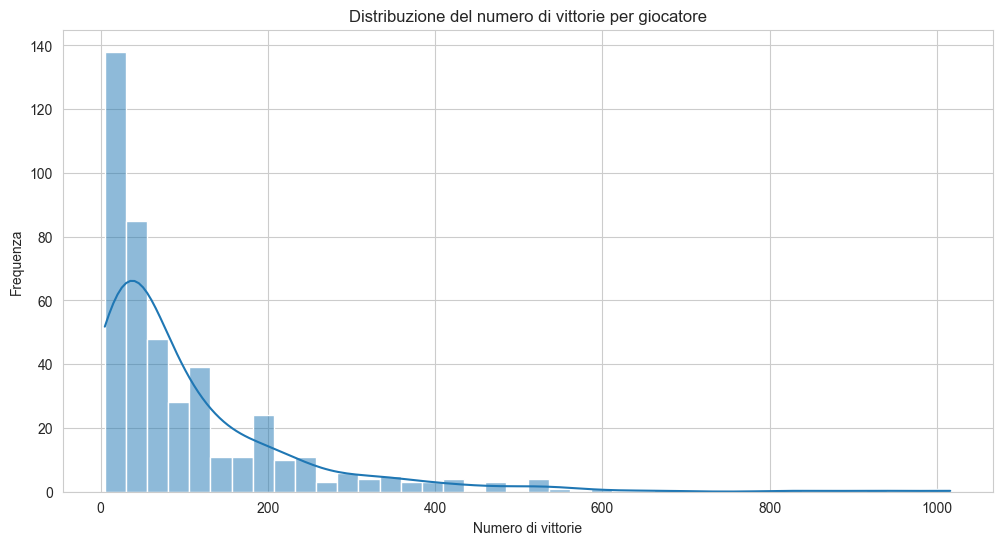

In [18]:
# 1. Distribuzione del numero di vittorie
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.histplot(data=player_summary['Total_Wins'], kde=True, bins=40)
plt.title('Distribuzione del numero di vittorie per giocatore')
plt.xlabel('Numero di vittorie')
plt.ylabel('Frequenza')
plt.show()

### La relazione tra ranking e vittorie

<Figure size 1800x1200 with 0 Axes>

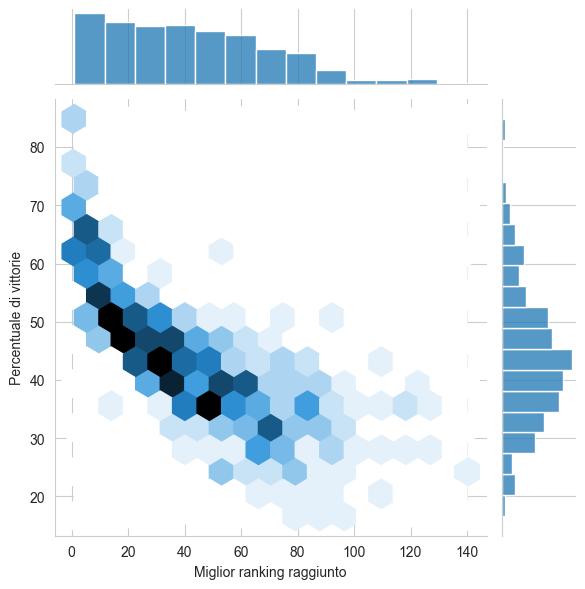

In [19]:
# 2. Relazione tra vittorie e ranking migliore
plt.figure(figsize=(18, 12))
sns.set_style('whitegrid')
sns.jointplot(data=player_summary, x='Max_Rank', y='Win_Percentage', kind='hex')
plt.xlabel('Miglior ranking raggiunto')
plt.ylabel('Percentuale di vittorie')
plt.show()

<Figure size 1800x1200 with 0 Axes>

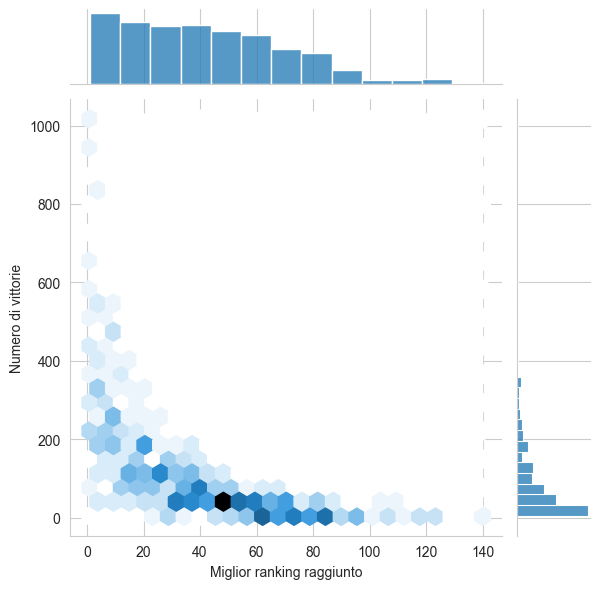

In [20]:
# 2. Relazione tra vittorie e ranking migliore
plt.figure(figsize=(18, 12))
sns.set_style('whitegrid')
sns.jointplot(data=player_summary, x='Max_Rank', y='Total_Wins', kind='hex')
plt.xlabel('Miglior ranking raggiunto')
plt.ylabel('Numero di vittorie')
plt.show()

### Come si distribuiscono le vittorie sulle diverse superfici

Numero totale di partite per superficie:
Wins_Clay: 28704
Wins_Grass: 10165
Wins_Hard: 53158


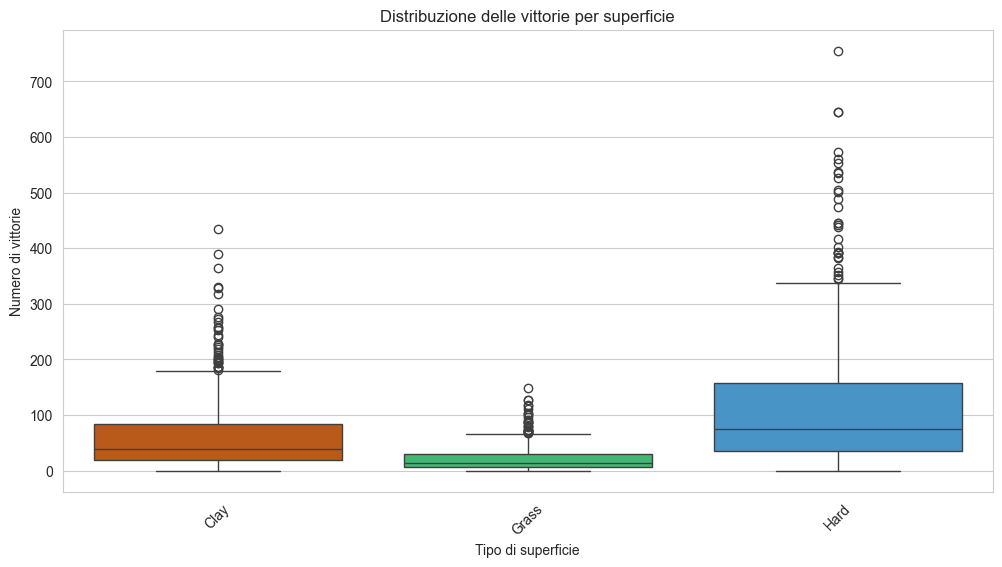

In [21]:
# 3. Distribuzione delle vittorie per superficie
surface_columns = ['Wins_Clay', 'Wins_Grass', 'Wins_Hard']
surface_data = player_summary[surface_columns]

# Calcolo del numero totale di partite per superficie
matches_per_surface = surface_data.sum()

# Stampa del numero di partite per ogni terreno
print("Numero totale di partite per superficie:")
for surface, matches in zip(surface_columns, matches_per_surface):
    print(f"{surface}: {matches:.0f}")

plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Definiamo i colori per ogni superficie
colors = {
    'Wins_Clay': '#d35400',  # Arancio scuro
    'Wins_Grass': '#2ecc71',  # Verde
    'Wins_Hard': '#3498db'   # Blu
}

# Creiamo il boxplot con i colori personalizzati
sns.boxplot(data=surface_data, palette=[colors[col] for col in surface_columns])

plt.title('Distribuzione delle vittorie per superficie')
plt.xlabel('Tipo di superficie')
plt.ylabel('Numero di vittorie')
surfaces = ["Clay", "Grass", "Hard"]
plt.xticks(ticks=range(len(surfaces)), labels=surfaces, rotation=45)
plt.show()

### Chi sono i giocatori più attivi?


/var/folders/zt/9ggmn83106zfjymwl_r2kkdh0000gn/T/ipykernel_33086/1257149416.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


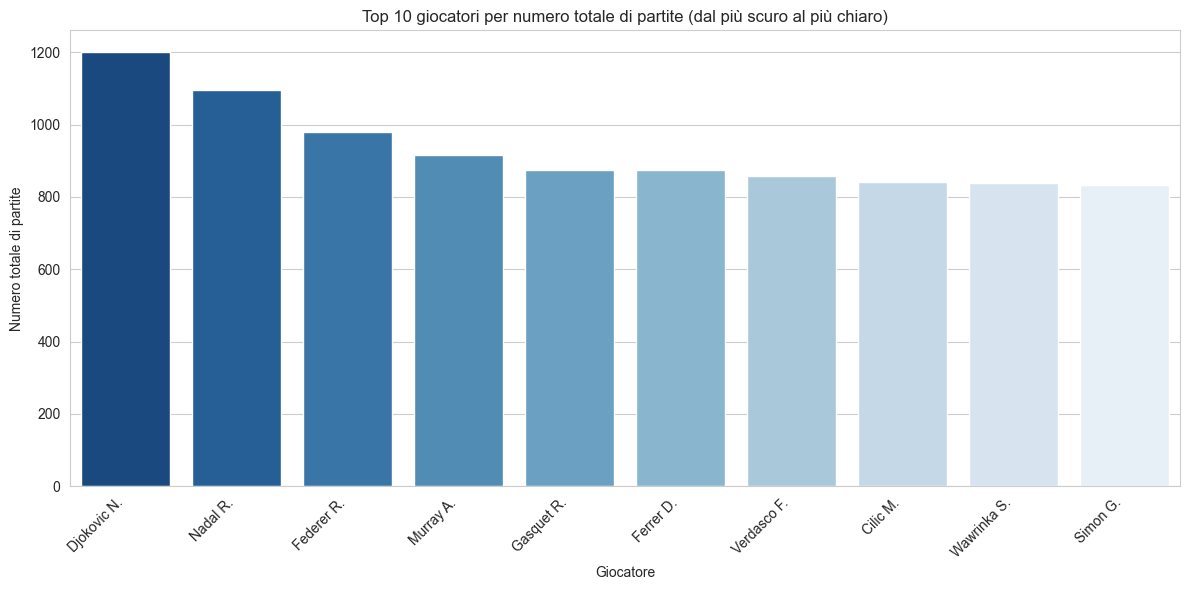

In [20]:
# 4. Top 10 giocatori per numero totale di partite con il primo più scuro e l'ultimo più chiaro
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Ordinare i top 10 giocatori per numero di partite
top_10_matches = player_summary.nlargest(10, 'Total_Matches')

# Creare una palette di colori e invertirla
colors = sns.color_palette('Blues', len(top_10_matches))[::-1]

# Creare l'istogramma con la palette invertita
sns.barplot(
    data=top_10_matches,
    x=top_10_matches.Player,
    y='Total_Matches',
    palette=colors
)

plt.title('Top 10 giocatori per numero totale di partite (dal più scuro al più chiaro)')
plt.xlabel('Giocatore')
plt.ylabel('Numero totale di partite')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Come sono correlate le diverse statistiche tra loro?

La matrice di correlazione è uno strumento molto utile per capire come le variabili del tuo dataset siano collegate tra loro. Essa mostra quanto due variabili siano correlate tra loro: se il valore della correlazione è vicino a 1, significa che c’è una forte correlazione positiva, se è vicino a -1, c’è una forte correlazione negativa, mentre un valore vicino a 0 indica che non c’è correlazione.

Passaggi per calcolare e visualizzare la matrice di correlazione:

1.	Calcolare la matrice di correlazione: Usiamo la funzione .corr() di Pandas, che calcola la correlazione tra le variabili numeriche nel DataFrame.
    
2.	Visualizzare la matrice di correlazione: Usiamo una heatmap per visualizzare la matrice, che rende più facile interpretare i valori di correlazione.

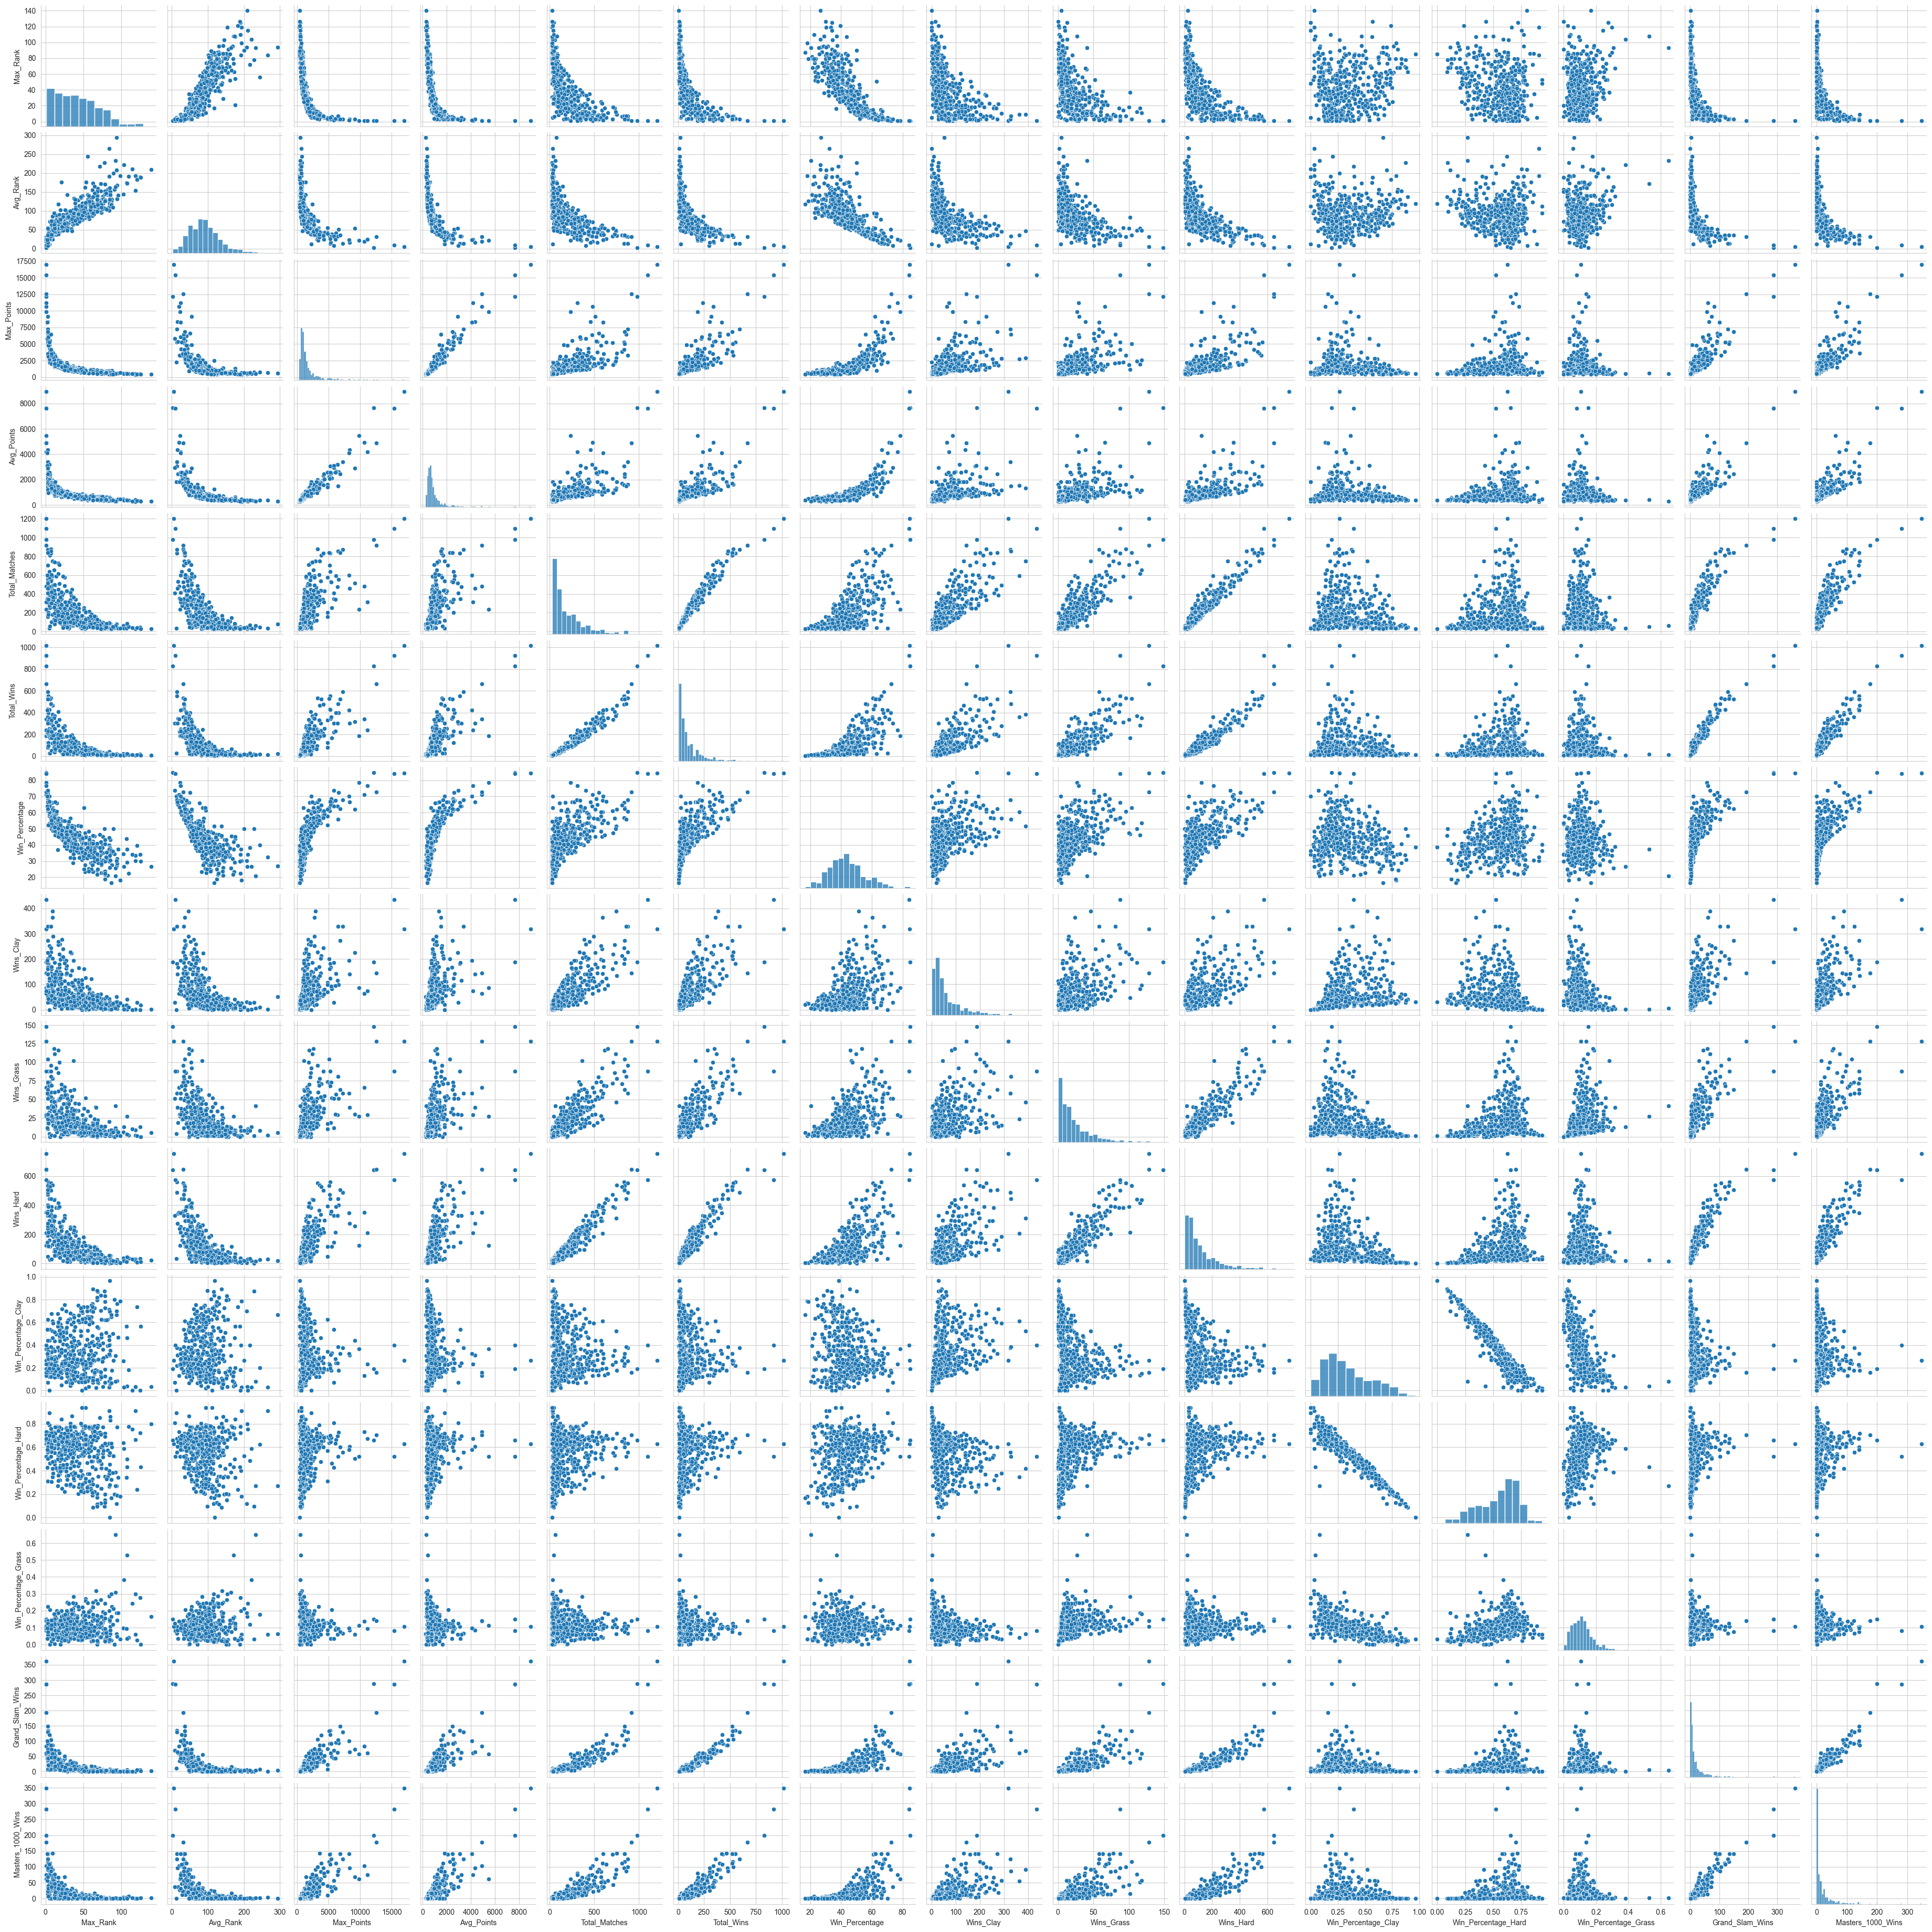

In [21]:
# sns.pairplot(): È una funzione di Seaborn che genera un pairplot, ovvero una matrice di grafici a dispersione tra tutte le coppie di colonne del DataFrame. 
# Inoltre, genera anche istogrammi lungo la diagonale per mostrare la distribuzione di ciascuna variabile.

sns.pairplot(player_summary)
plt.show()

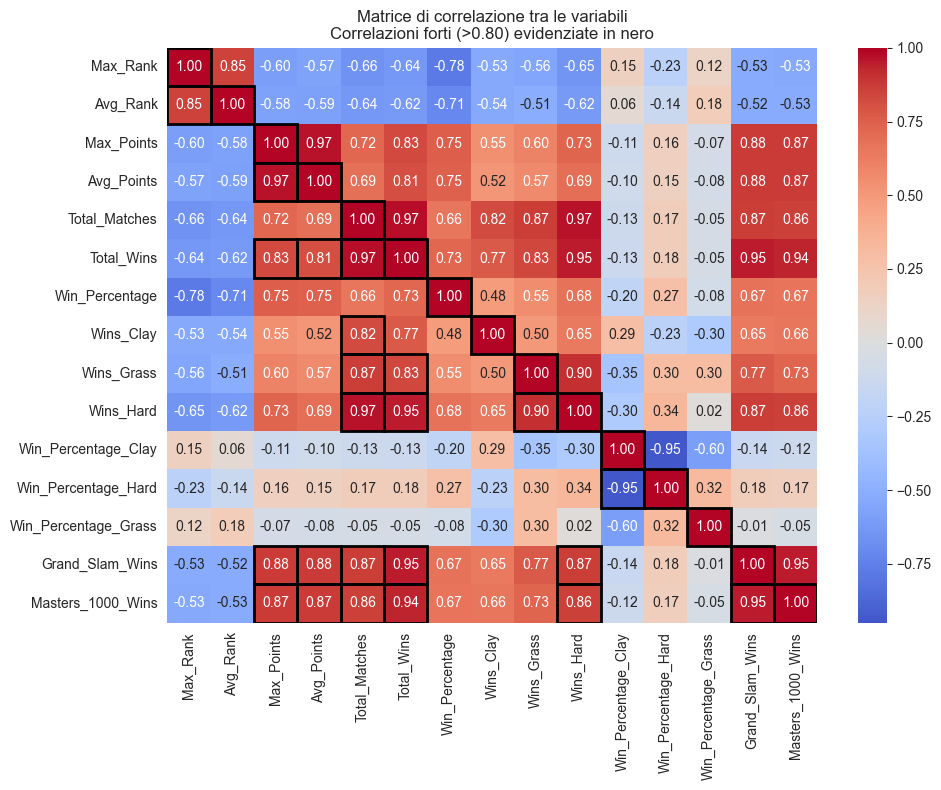

Numero totale di correlazioni possibili: 105

Numero di correlazioni forti (>0.80): 38
Percentuale di correlazioni forti: 36.19%

Correlazioni forti (>0.80):
Max_Rank - Max_Rank: 1.00
Avg_Rank - Max_Rank: 0.85
Avg_Rank - Avg_Rank: 1.00
Max_Points - Max_Points: 1.00
Avg_Points - Max_Points: 0.97
Avg_Points - Avg_Points: 1.00
Total_Matches - Total_Matches: 1.00
Total_Wins - Max_Points: 0.83
Total_Wins - Avg_Points: 0.81
Total_Wins - Total_Matches: 0.97
Total_Wins - Total_Wins: 1.00
Win_Percentage - Win_Percentage: 1.00
Wins_Clay - Total_Matches: 0.82
Wins_Clay - Wins_Clay: 1.00
Wins_Grass - Total_Matches: 0.87
Wins_Grass - Total_Wins: 0.83
Wins_Grass - Wins_Grass: 1.00
Wins_Hard - Total_Matches: 0.97
Wins_Hard - Total_Wins: 0.95
Wins_Hard - Wins_Grass: 0.90
Wins_Hard - Wins_Hard: 1.00
Win_Percentage_Clay - Win_Percentage_Clay: 1.00
Win_Percentage_Hard - Win_Percentage_Clay: -0.95
Win_Percentage_Hard - Win_Percentage_Hard: 1.00
Win_Percentage_Grass - Win_Percentage_Grass: 1.00
Grand_Slam_

In [22]:
plt.figure(figsize=(10, 8))

# Calcoliamo la matrice di correlazione
correlation_matrix = player_summary.select_dtypes(include=['float64', 'int64']).corr()

# Creiamo una maschera per il triangolo superiore
mask_upper = np.triu(np.ones_like(correlation_matrix), k=1)

# Creiamo una maschera per le correlazioni forti
mask_strong = np.abs(correlation_matrix.values) > 0.8
mask_strong[mask_upper.astype(bool)] = False

# Visualizziamo la matrice di correlazione
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            center=0)

# Evidenziamo le correlazioni forti
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if mask_strong[i, j]:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=2))

plt.title('Matrice di correlazione tra le variabili\nCorrelazioni forti (>0.80) evidenziate in nero')
plt.tight_layout()
plt.show()

# Contiamo il numero di correlazioni forti e totali
n_strong_correlations = np.sum(mask_strong)
n_total_correlations = (len(correlation_matrix) * (len(correlation_matrix) - 1)) // 2  # solo triangolo inferiore

print(f"Numero totale di correlazioni possibili: {n_total_correlations}")
print(f"\nNumero di correlazioni forti (>0.80): {n_strong_correlations}")
print(f"Percentuale di correlazioni forti: {(n_strong_correlations/n_total_correlations)*100:.2f}%")

print("\nCorrelazioni forti (>0.80):")
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if mask_strong[i, j]:
            print(f"{correlation_matrix.index[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")

## PCA

La PCA (Principal Component Analysis) è una tecnica di riduzione della dimensionalità che consente di ridurre il numero di variabili, mantenendo la maggior parte dell’informazione (varianza) del dataset originale. PCA trova delle combinazioni lineari delle variabili originali chiamate componenti principali che spiegano la maggior parte della varianza nel dataset.

Quando hai un dataset con molte feature correlate, come nel tuo caso, la PCA ti permette di ridurre il numero di variabili senza perdere informazioni cruciali, migliorando l’efficienza computazionale e la comprensibilità del modello.

Passaggi per applicare PCA:

1.	Preparare i dati: È importante normalizzare i dati prima di applicare la PCA, poiché PCA è sensibile alla scala delle variabili.

2.	Applicare PCA: Usare PCA di Scikit-learn per ridurre il numero di componenti.

3.	Scegliere il numero di componenti: Decidere quante componenti principali mantenere. Generalmente si mantiene abbastanza componenti per spiegare una percentuale significativa della varianza (ad esempio, l’80% della varianza).

Codice per applicare la PCA:

1.	Normalizzazione dei Dati: Prima di applicare PCA, bisogna normalizzare i dati (ridurre i valori a una scala comune).

2.	Applicazione della PCA: Dopo aver normalizzato i dati, possiamo applicare la PCA e ridurre il numero di componenti.

In [23]:
%pip install KMeans

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


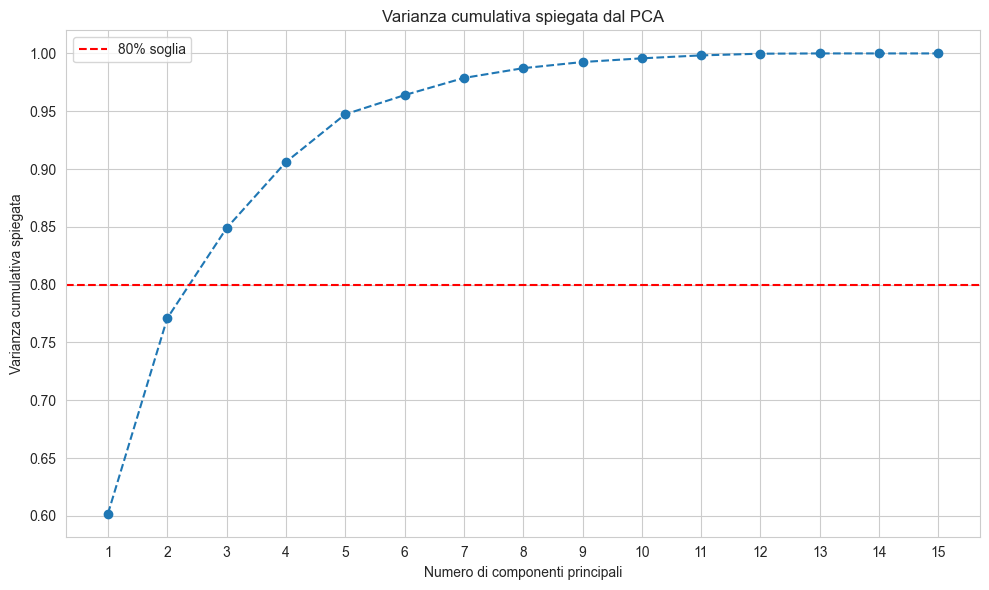

Numero di componenti principali con almeno l'80% di varianza spiegata: 3


In [24]:
# CON TUTTE LE FEATURE

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

features = ['Max_Rank', 'Avg_Rank', 'Max_Points', 'Avg_Points', 'Total_Matches', 'Total_Wins', 'Win_Percentage', 'Wins_Clay', 'Wins_Grass', 'Wins_Hard', 'Win_Percentage_Clay', 'Win_Percentage_Hard', 'Win_Percentage_Grass', 'Grand_Slam_Wins', 'Masters_1000_Wins']
df_player_stats = player_summary[features]

# 1. Normalizzazione del DataFrame
scaler = StandardScaler()
df_player_stats_std = scaler.fit_transform(df_player_stats)

# 2. PCA per analizzare la varianza spiegata
pca = PCA()
pca.fit(df_player_stats_std)

# Calcolo della varianza cumulativa
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# 3. Visualizzare la varianza cumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='--', label="80% soglia")
plt.title('Varianza cumulativa spiegata dal PCA')
plt.xlabel('Numero di componenti principali')
plt.ylabel('Varianza cumulativa spiegata')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))
plt.legend()
plt.tight_layout()
plt.show()

# 4. Selezione del numero di componenti principali per 80% di informazione
n_components = next(i for i, v in enumerate(cumulative_variance_ratio) if v >= 0.8) + 1
print(f"Numero di componenti principali con almeno l'80% di varianza spiegata: {n_components}")

In [25]:
# Stampa dei nomi di tutte le colonne
print(player_summary.columns.tolist())

['Player', 'Max_Rank', 'Avg_Rank', 'Max_Points', 'Avg_Points', 'Total_Matches', 'Total_Wins', 'Win_Percentage', 'Wins_Clay', 'Wins_Grass', 'Wins_Hard', 'Win_Percentage_Clay', 'Win_Percentage_Hard', 'Win_Percentage_Grass', 'Grand_Slam_Wins', 'Masters_1000_Wins']


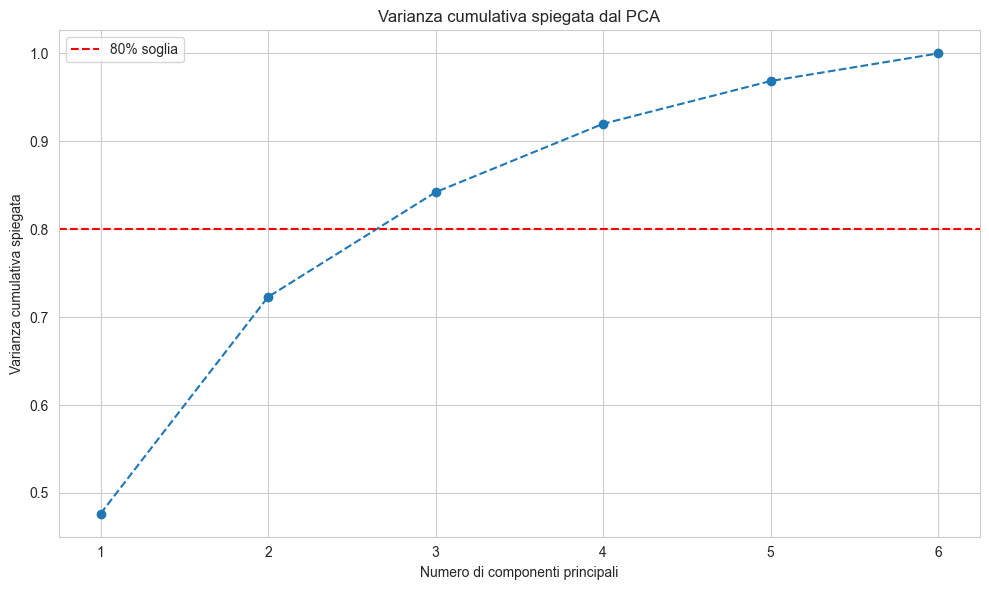

Numero di componenti principali con almeno l'80% di varianza spiegata: 3


In [26]:
# SOLO CON ALCUNE FEATURE

features = ['Avg_Rank', 'Win_Percentage', 'Wins_Clay', 'Win_Percentage_Hard', 'Win_Percentage_Grass', 'Masters_1000_Wins']

df_player_stats = player_summary[features]

# 1. Normalizzazione del DataFrame
scaler = StandardScaler()
df_player_stats_std = scaler.fit_transform(df_player_stats)

# 2. PCA per analizzare la varianza spiegata
pca = PCA()
pca.fit(df_player_stats_std)

# Calcolo della varianza cumulativa
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# 3. Visualizzare la varianza cumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='--', label="80% soglia")
plt.title('Varianza cumulativa spiegata dal PCA')
plt.xlabel('Numero di componenti principali')
plt.ylabel('Varianza cumulativa spiegata')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))
plt.legend()
plt.tight_layout()
plt.show()

# 4. Selezione del numero di componenti principali per 80% di informazione
n_components = next(i for i, v in enumerate(cumulative_variance_ratio) if v >= 0.8) + 1
print(f"Numero di componenti principali con almeno l'80% di varianza spiegata: {n_components}")

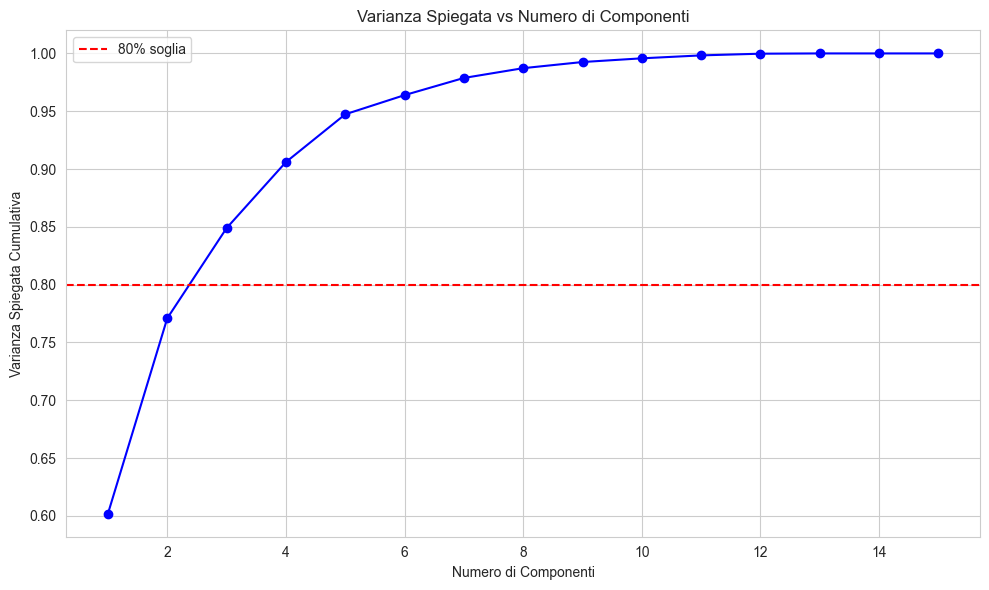


Varianza spiegata da ogni componente:
Componente 1: 0.602 (60.2%)
Componente 2: 0.169 (16.9%)
Componente 3: 0.078 (7.8%)
Componente 4: 0.057 (5.7%)
Componente 5: 0.041 (4.1%)
Componente 6: 0.017 (1.7%)
Componente 7: 0.015 (1.5%)
Componente 8: 0.008 (0.8%)
Componente 9: 0.005 (0.5%)
Componente 10: 0.003 (0.3%)
Componente 11: 0.003 (0.3%)
Componente 12: 0.001 (0.1%)
Componente 13: 0.000 (0.0%)
Componente 14: 0.000 (0.0%)
Componente 15: 0.000 (0.0%)

Matrice dei componenti principali:
          Max_Rank      Avg_Rank    Max_Points    Avg_Points  Total_Matches  \
PC1  -2.508843e-01 -2.429599e-01  2.931219e-01  2.873229e-01       0.313699   
PC2  -1.273462e-02 -7.360546e-02  3.673358e-02  4.079529e-02       0.035850   
PC3   4.973395e-01  4.875107e-01  2.389347e-02  9.460425e-03       0.136966   
PC4   2.327045e-01  2.070109e-01  4.365215e-01  4.874103e-01      -0.276405   
PC5  -2.059755e-01 -2.156692e-01  1.608909e-01  1.774406e-01      -0.164106   
PC6  -3.122678e-02  3.118508e-01  2.23

In [27]:
# CON TUTTE LE FEATURE

# Selezione delle features numeriche rilevanti
features = ['Max_Rank', 'Avg_Rank', 'Max_Points', 'Avg_Points', 'Total_Matches', 'Total_Wins', 'Win_Percentage', 'Wins_Clay', 'Wins_Grass', 'Wins_Hard', 'Win_Percentage_Clay', 'Win_Percentage_Hard', 'Win_Percentage_Grass', 'Grand_Slam_Wins', 'Masters_1000_Wins']

X = player_summary[features]

# Standardizzazione dei dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applicazione PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Visualizzazione della varianza spiegata
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Numero di Componenti')
plt.ylabel('Varianza Spiegata Cumulativa')
plt.axhline(y=0.8, color='r', linestyle='--', label="80% soglia")
plt.title('Varianza Spiegata vs Numero di Componenti')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Stampa della varianza spiegata
print("\nVarianza spiegata da ogni componente:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Componente {i+1}: {var:.3f} ({var*100:.1f}%)")

# Matrice dei componenti
componenti_df = pd.DataFrame(
    pca.components_,
    columns=features,
    index=[f'PC{i+1}' for i in range(len(pca.components_))]
)

print("\nMatrice dei componenti principali:")
print(componenti_df)

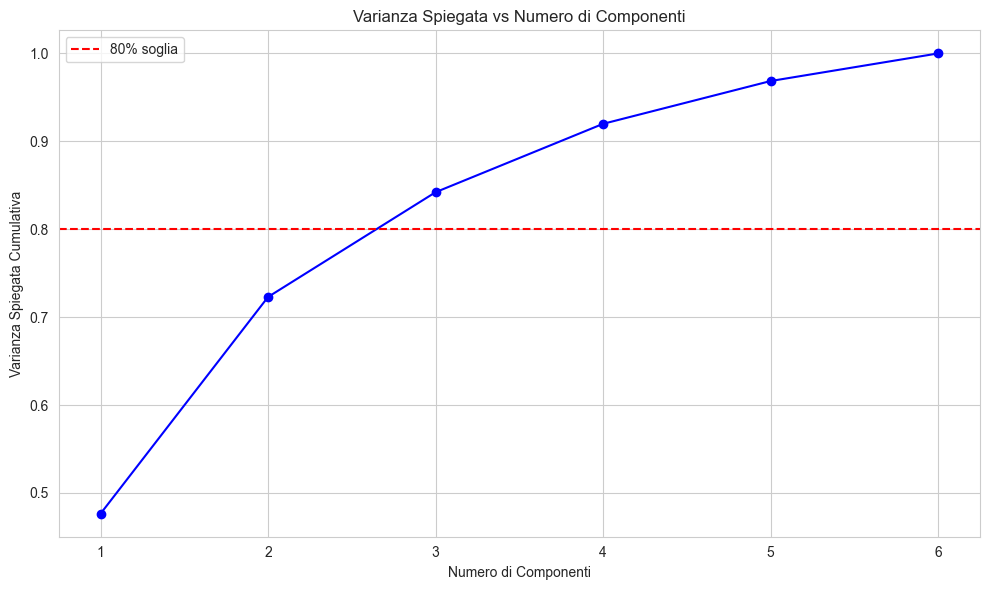


Varianza spiegata da ogni componente:
Componente 1: 0.476 (47.6%)
Componente 2: 0.247 (24.7%)
Componente 3: 0.119 (11.9%)
Componente 4: 0.078 (7.8%)
Componente 5: 0.049 (4.9%)
Componente 6: 0.031 (3.1%)

Matrice dei componenti principali:
     Avg_Rank  Win_Percentage  Wins_Clay  Win_Percentage_Hard  \
PC1 -0.492943        0.508953   0.467994             0.073825   
PC2 -0.051064        0.203203  -0.307200             0.706875   
PC3  0.239731       -0.146994   0.365312            -0.424512   
PC4  0.640939       -0.194751   0.183103             0.393381   
PC5  0.379051        0.657283  -0.495103            -0.365967   
PC6 -0.377421       -0.456201  -0.523931            -0.161206   

     Win_Percentage_Grass  Masters_1000_Wins  
PC1             -0.147509           0.501743  
PC2              0.593235           0.100646  
PC3              0.712412           0.315798  
PC4             -0.336794           0.499563  
PC5             -0.047982           0.207216  
PC6             -0.055

In [28]:
# SOLO CON ALCUNE FEATURE

# Selezione delle features numeriche rilevanti
features_for_pca = ['Avg_Rank', 'Win_Percentage', 'Wins_Clay', 'Win_Percentage_Hard', 'Win_Percentage_Grass', 'Masters_1000_Wins']

X = player_summary[features_for_pca]

# Standardizzazione dei dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applicazione PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Visualizzazione della varianza spiegata
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Numero di Componenti')
plt.ylabel('Varianza Spiegata Cumulativa')
plt.axhline(y=0.8, color='r', linestyle='--', label="80% soglia")
plt.title('Varianza Spiegata vs Numero di Componenti')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Stampa della varianza spiegata
print("\nVarianza spiegata da ogni componente:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Componente {i+1}: {var:.3f} ({var*100:.1f}%)")

# Matrice dei componenti
componenti_df = pd.DataFrame(
    pca.components_,
    columns=features_for_pca,
    index=[f'PC{i+1}' for i in range(len(pca.components_))]
)

print("\nMatrice dei componenti principali:")
print(componenti_df)

#### procediamo solo con le feature ridotte, in quanto non cambia l'applicazione della PCA
Da 15 a 6, ed ora da 6 a 3 Feature

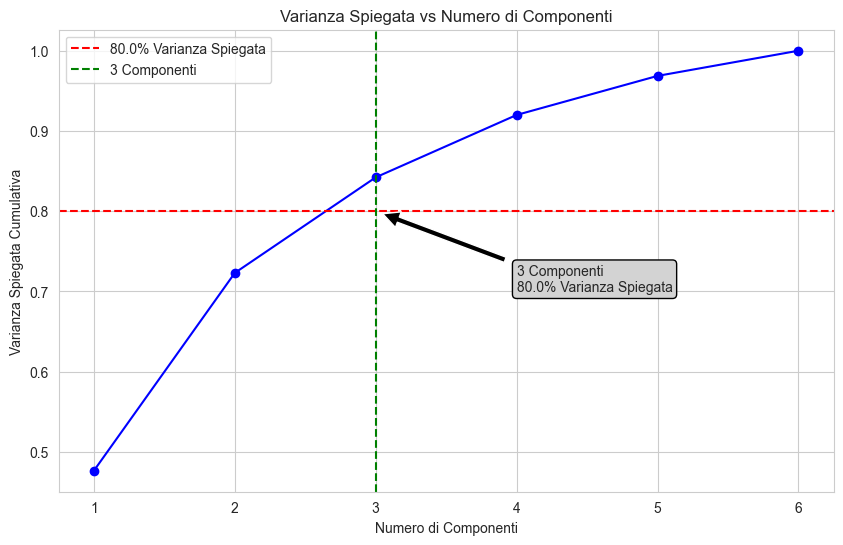

In [29]:
# 3. Visualizzazione della varianza spiegata
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Numero di Componenti')
plt.ylabel('Varianza Spiegata Cumulativa')
plt.title('Varianza Spiegata vs Numero di Componenti')
plt.grid(True)

# Annotazione per il punto di scelta delle componenti
threshold = 0.8  # Soglia di varianza spiegata (80%)
num_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= threshold) + 1

plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100}% Varianza Spiegata')
plt.axvline(x=num_components, color='g', linestyle='--', label=f'{num_components} Componenti')

plt.annotate(f'{num_components} Componenti\n{threshold*100}% Varianza Spiegata', 
             xy=(num_components, threshold), 
             xytext=(num_components+1, threshold-0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, 
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'))

plt.legend()
plt.show()

In [30]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Applicare PCA per mantenere l'80% della varianza cumulativa
pca = PCA(n_components=0.8)  # Conserva almeno l'80% della varianza
scores_pca = pca.fit_transform(df_player_stats_std)

print(f"Forma del dataset dopo PCA: {scores_pca.shape}")
print(f"Varianza spiegata cumulativa: {pca.explained_variance_ratio_.sum() * 100:.2f}%")

Forma del dataset dopo PCA: (446, 3)
Varianza spiegata cumulativa: 84.21%


## KMEANS


Calcolo metriche per diversi valori di k...


Analisi cluster: 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]


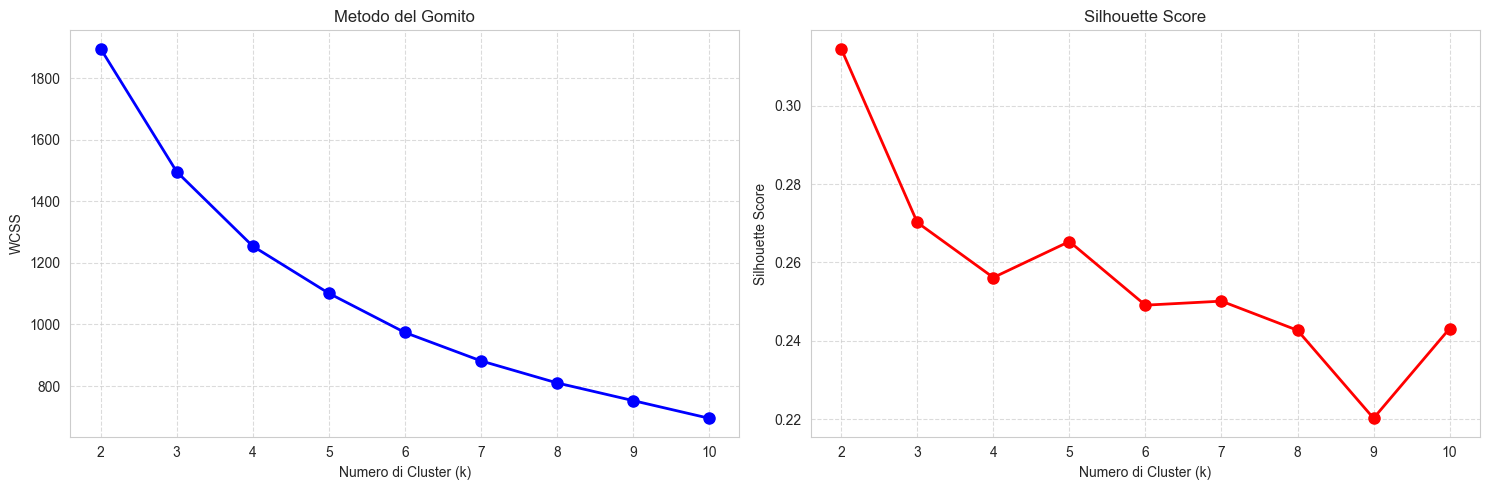


Analisi dettagliata:
k	WCSS		Silhouette	Riduzione WCSS
2	1895		0.315		N/A
3	1496		0.270		21.07%
4	1254		0.256		16.15%
5	1101		0.265		12.20%
6	974		0.249		11.55%
7	882		0.250		9.46%
8	810		0.243		8.11%
9	753		0.220		7.08%
10	696		0.243		7.63%


In [31]:
from tqdm import tqdm  # Aggiungiamo questo import

# Calcoliamo sia WCSS che Silhouette Score
wcss = []
silhouette_scores = []
k_range = range(2, 11)  # Partiamo da 2 perché la silhouette richiede almeno 2 cluster

print("\nCalcolo metriche per diversi valori di k...")
for k in tqdm(k_range, desc="Analisi cluster"):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Visualizziamo entrambe le metriche
plt.figure(figsize=(15, 5))

# Grafico del gomito
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.title('Metodo del Gomito', fontsize=12)
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('WCSS')
plt.grid(True, linestyle='--', alpha=0.7)

# Grafico Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.title('Silhouette Score', fontsize=12)
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Stampiamo i valori
print("\nAnalisi dettagliata:")
print("k\tWCSS\t\tSilhouette\tRiduzione WCSS")
for i, k in enumerate(k_range):
    if i == 0:
        reduction = "N/A"
    else:
        reduction = f"{((wcss[i-1] - wcss[i]) / wcss[i-1] * 100):.2f}%"
    print(f"{k}\t{wcss[i]:.0f}\t\t{silhouette_scores[i]:.3f}\t\t{reduction}")

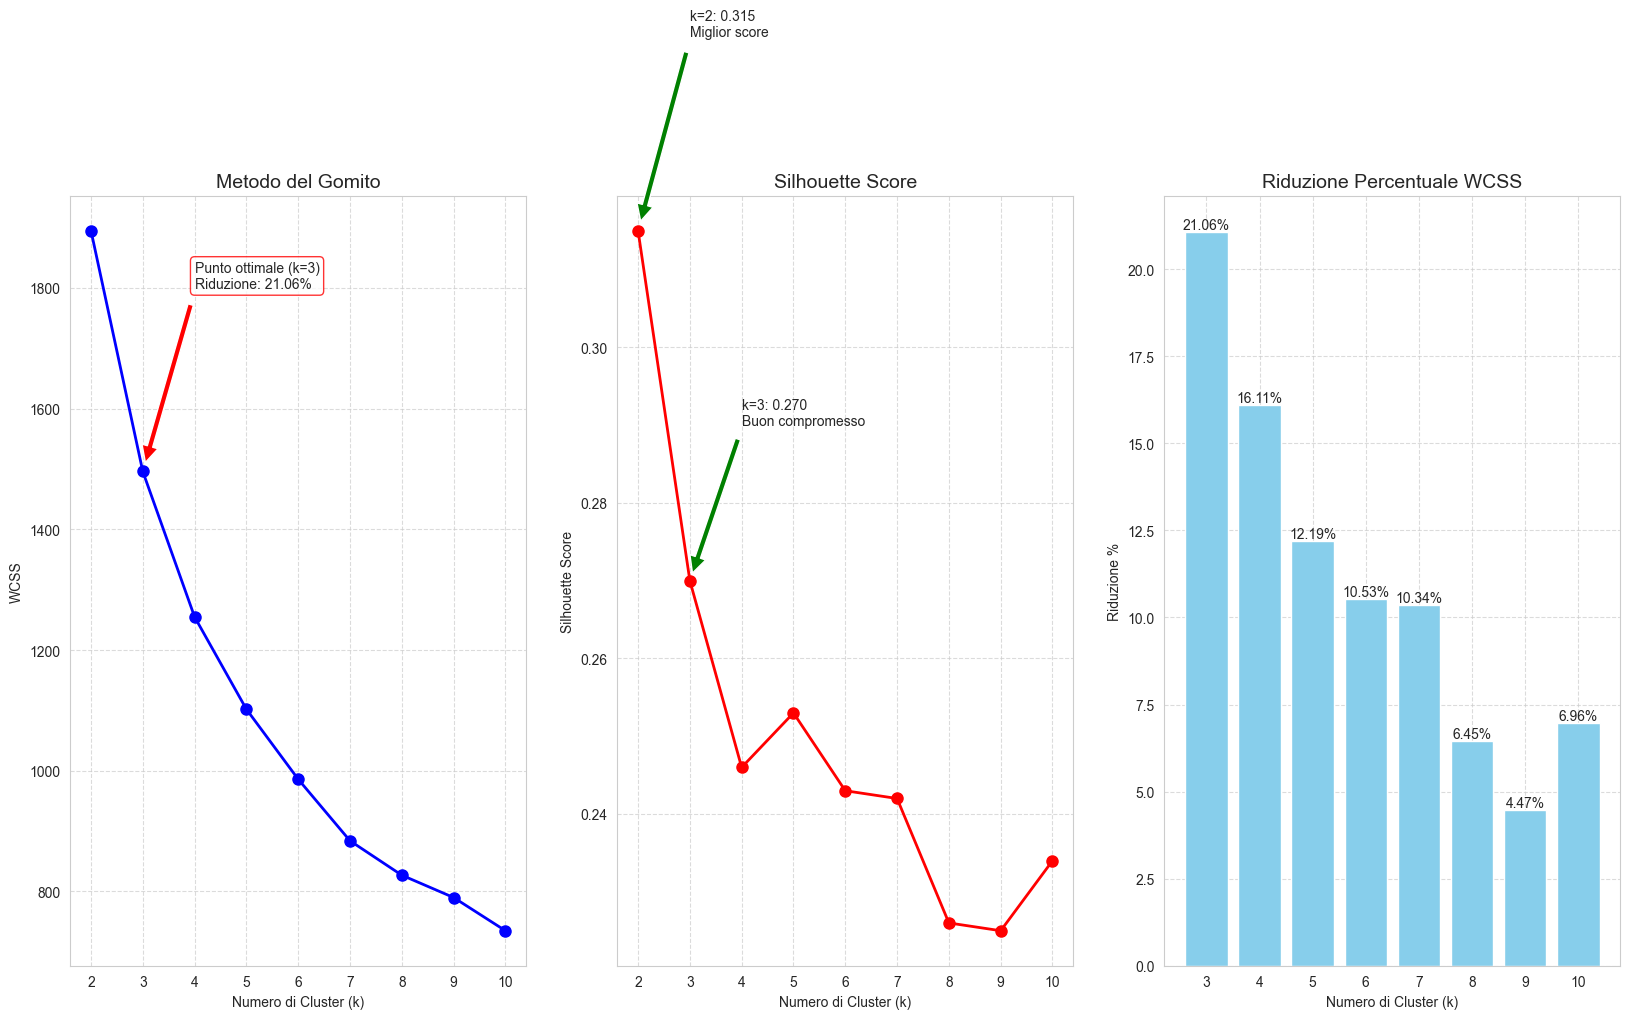


Riepilogo Analisi:
------------------
1. Silhouette Score:
   - Massimo: 0.315 (k=2)
   - k=3: 0.270 (buon compromesso)

2. Riduzioni WCSS significative:
   - k=2→3: 21.06%
   - k=3→4: 16.12%
   - k=4→5: 12.15%

3. Conclusione:
   k=3 offre il miglior compromesso tra:
   - Qualità dei cluster (Silhouette ~ 0.27)
   - Riduzione significativa del WCSS (21.06%)
   - Complessità interpretabile


In [32]:
import matplotlib.pyplot as plt

# Dati forniti
k_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]
wcss = [1895, 1496, 1255, 1102, 986, 884, 827, 790, 735]
silhouette_scores = [0.315, 0.270, 0.246, 0.253, 0.243, 0.242, 0.226, 0.225, 0.234]
reductions = [(wcss[i-1] - wcss[i]) / wcss[i-1] * 100 for i in range(1, len(wcss))]

# Visualizzazione dettagliata delle metriche
plt.figure(figsize=(20, 10))

# 1. Grafico del gomito con annotazioni
plt.subplot(1, 3, 1)
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.title('Metodo del Gomito', fontsize=14)
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('WCSS')
plt.grid(True, linestyle='--', alpha=0.7)

# Aggiungiamo freccia e annotazione per k=3
plt.annotate('Punto ottimale (k=3)\nRiduzione: 21.06%', 
             xy=(3, 1496), 
             xytext=(4, 1800),
             arrowprops=dict(facecolor='red', shrink=0.05),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.8))

# 2. Grafico Silhouette Score con annotazioni
plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.title('Silhouette Score', fontsize=14)
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.7)

# Annotazioni per k=2 e k=3
plt.annotate('k=2: 0.315\nMiglior score', 
             xy=(2, 0.315),
             xytext=(3, 0.34),
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate('k=3: 0.270\nBuon compromesso', 
             xy=(3, 0.270),
             xytext=(4, 0.29),
             arrowprops=dict(facecolor='green', shrink=0.05))

# 3. Grafico delle riduzioni percentuali
plt.subplot(1, 3, 3)
plt.bar(k_range[1:], reductions, color='skyblue')
plt.title('Riduzione Percentuale WCSS', fontsize=14)
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Riduzione %')
plt.grid(True, linestyle='--', alpha=0.7)

for i, reduction in enumerate(reductions):
    plt.text(k_range[i+1], reduction, f'{reduction:.2f}%', 
             ha='center', va='bottom')

plt.show()

# Stampa riepilogo analisi
print("\nRiepilogo Analisi:")
print("------------------")
print("1. Silhouette Score:")
print("   - Massimo: 0.315 (k=2)")
print("   - k=3: 0.270 (buon compromesso)")
print("\n2. Riduzioni WCSS significative:")
print("   - k=2→3: 21.06%")
print("   - k=3→4: 16.12%")
print("   - k=4→5: 12.15%")
print("\n3. Conclusione:")
print("   k=3 offre il miglior compromesso tra:")
print("   - Qualità dei cluster (Silhouette ~ 0.27)")
print("   - Riduzione significativa del WCSS (21.06%)")
print("   - Complessità interpretabile")

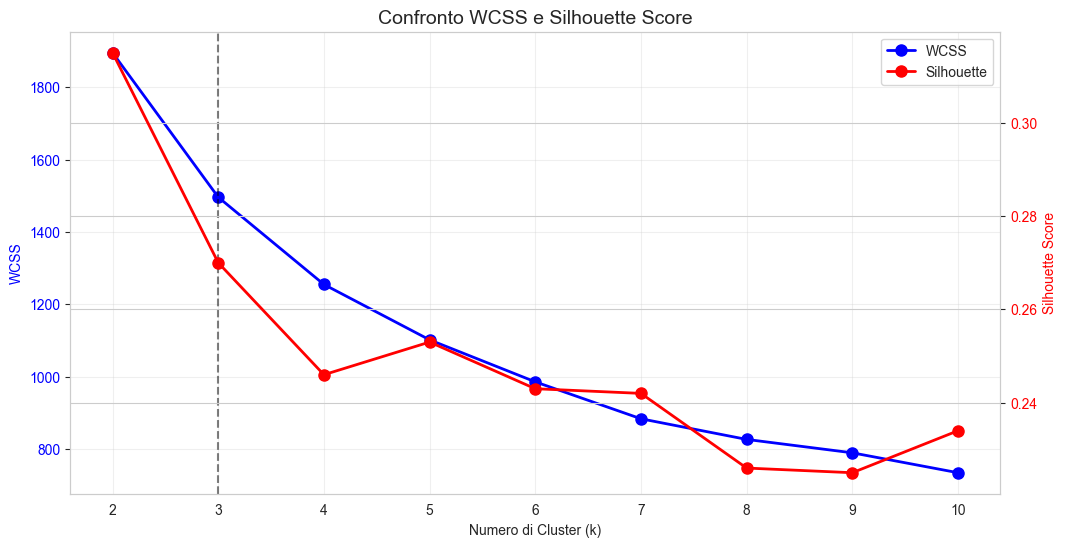

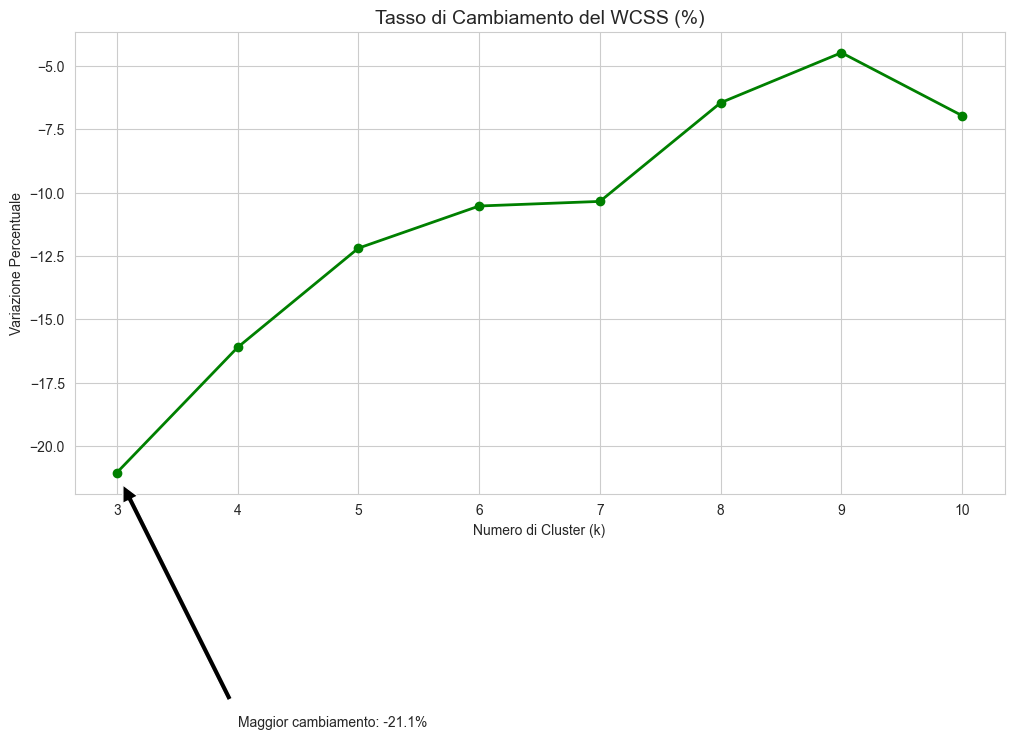

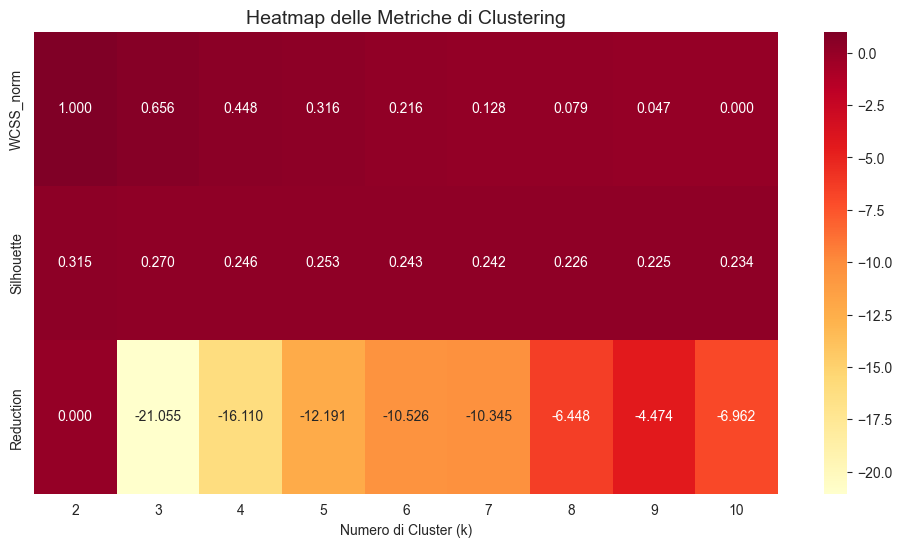


Analisi Dettagliata per k=2,3,4:
---------------------------------

k=2:
WCSS: 1895
Silhouette Score: 0.315

k=3:
WCSS: 1496
Silhouette Score: 0.270
Riduzione WCSS dal cluster precedente: 21.1%

k=4:
WCSS: 1255
Silhouette Score: 0.246
Riduzione WCSS dal cluster precedente: 16.1%


In [33]:
# Convertiamo le liste in array numpy
wcss = np.array(wcss)
silhouette_scores = np.array(silhouette_scores)

# 1. Grafico combinato WCSS e Silhouette
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot WCSS
line1 = ax1.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8, label='WCSS')
ax1.set_xlabel('Numero di Cluster (k)')
ax1.set_ylabel('WCSS', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot Silhouette
line2 = ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8, label='Silhouette')
ax2.set_ylabel('Silhouette Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Aggiungiamo linee verticali k=3
ax1.axvline(x=3, color='black', linestyle='--', alpha=0.5)

# Combiniamo le legende
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

plt.title('Confronto WCSS e Silhouette Score', fontsize=14)
ax1.grid(True, alpha=0.3)
plt.show()

# 2. Grafico della derivata del WCSS
plt.figure(figsize=(12, 6))
wcss_changes = np.diff(wcss) / wcss[:-1] * 100
plt.plot(k_range[1:], wcss_changes, 'go-', linewidth=2)
plt.title('Tasso di Cambiamento del WCSS (%)', fontsize=14)
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Variazione Percentuale')
plt.grid(True)

# Evidenziamo il punto di maggior cambiamento
plt.annotate(f'Maggior cambiamento: {wcss_changes[0]:.1f}%',
             xy=(3, wcss_changes[0]),
             xytext=(4, wcss_changes[0]-10),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# 3. Heatmap delle metriche normalizzate
plt.figure(figsize=(12, 6))
metrics_df = pd.DataFrame({
    'WCSS_norm': (wcss - wcss.min()) / (wcss.max() - wcss.min()),
    'Silhouette': silhouette_scores,
    'Reduction': np.pad(wcss_changes, (1,0), 'constant')
}, index=k_range)

sns.heatmap(metrics_df.T, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Heatmap delle Metriche di Clustering', fontsize=14)
plt.xlabel('Numero di Cluster (k)')
plt.show()

# Stampa analisi dettagliata
print("\nAnalisi Dettagliata per k=2,3,4:")
print("---------------------------------")
for k in [2,3,4]:
    idx = k-2
    print(f"\nk={k}:")
    print(f"WCSS: {wcss[idx]:.0f}")
    print(f"Silhouette Score: {silhouette_scores[idx]:.3f}")
    if k > 2:
        print(f"Riduzione WCSS dal cluster precedente: {abs(wcss_changes[idx-1]):.1f}%")

In [34]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Applicazione K-means
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=42)

cluster_labels = kmeans.fit_predict(X_pca) + 1  # Aggiungiamo 1 per partire da 1 invece che da 0

# Verifica dimensioni
print("\nVerifica dimensioni:")
print("Dimensione X_pca:", X_pca.shape)
print("Dimensione cluster_labels:", len(cluster_labels))
print("Dimensione df_player_stats:", df_player_stats.shape)

# Definiamo una palette di colori coerente per i cluster
cluster_colors = ['#2ecc71', '#e74c3c', '#3498db']  # verde, rosso, blu
plt.style.use('ggplot')


Verifica dimensioni:
Dimensione X_pca: (446, 6)
Dimensione cluster_labels: 446
Dimensione df_player_stats: (446, 6)



9. Creazione visualizzazione dei cluster...


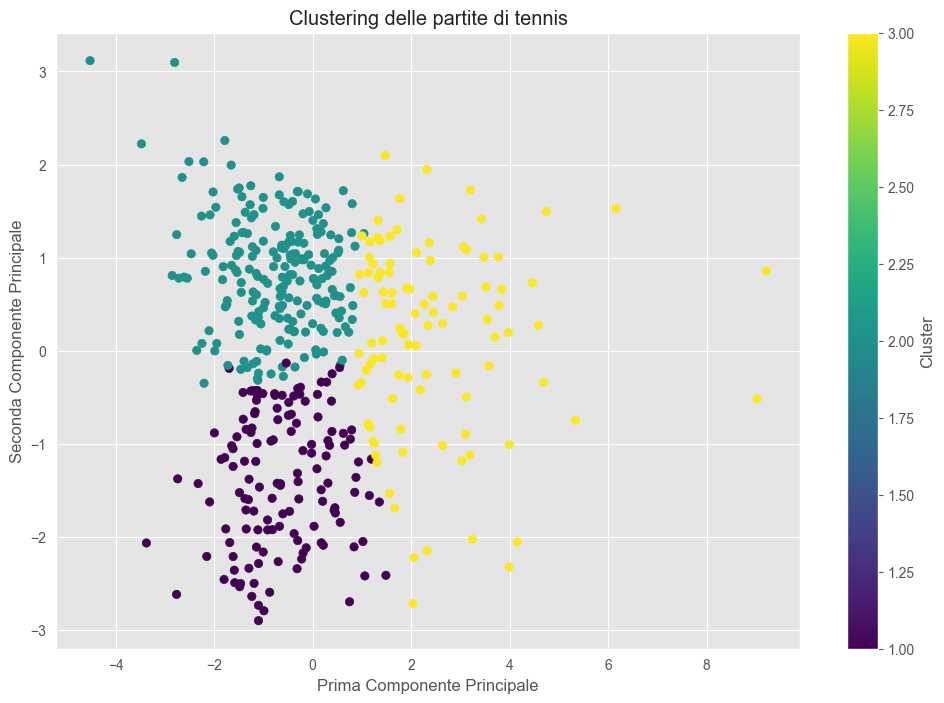

In [35]:
# 9. Visualizzazione dei cluster (prime due componenti PCA)
print("\n9. Creazione visualizzazione dei cluster...")
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clustering delle partite di tennis')
plt.xlabel('Prima Componente Principale')
plt.ylabel('Seconda Componente Principale')
plt.colorbar(scatter, label='Cluster')
plt.show()

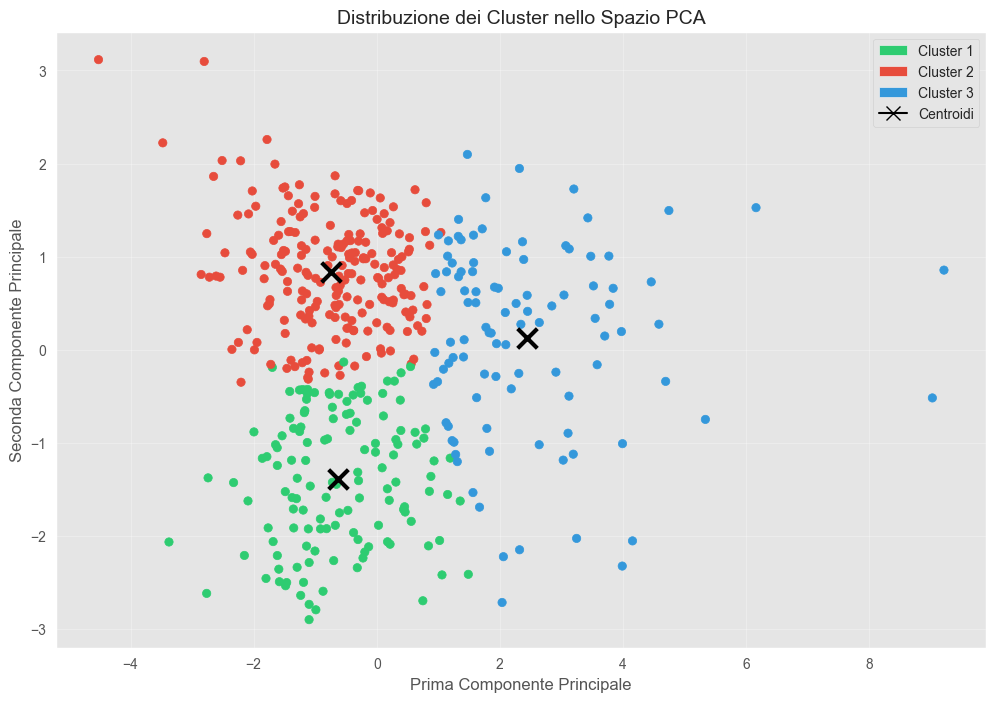

In [36]:
# 2. Scatter plot dei cluster
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, 
                     cmap=ListedColormap(cluster_colors))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           marker='x', s=200, linewidths=3, color='black', label='Centroidi')
plt.title('Distribuzione dei Cluster nello Spazio PCA', fontsize=14)
plt.xlabel('Prima Componente Principale', fontsize=12)
plt.ylabel('Seconda Componente Principale', fontsize=12)

# Legenda personalizzata
legend_elements = [Patch(facecolor=color, label=f'Cluster {i+1}') 
                  for i, color in enumerate(cluster_colors)]
legend_elements.append(Line2D([0], [0], marker='x', color='black', markerfacecolor='black',
                            markersize=10, label='Centroidi'))
plt.legend(handles=legend_elements)
plt.grid(True, alpha=0.3)
plt.show()

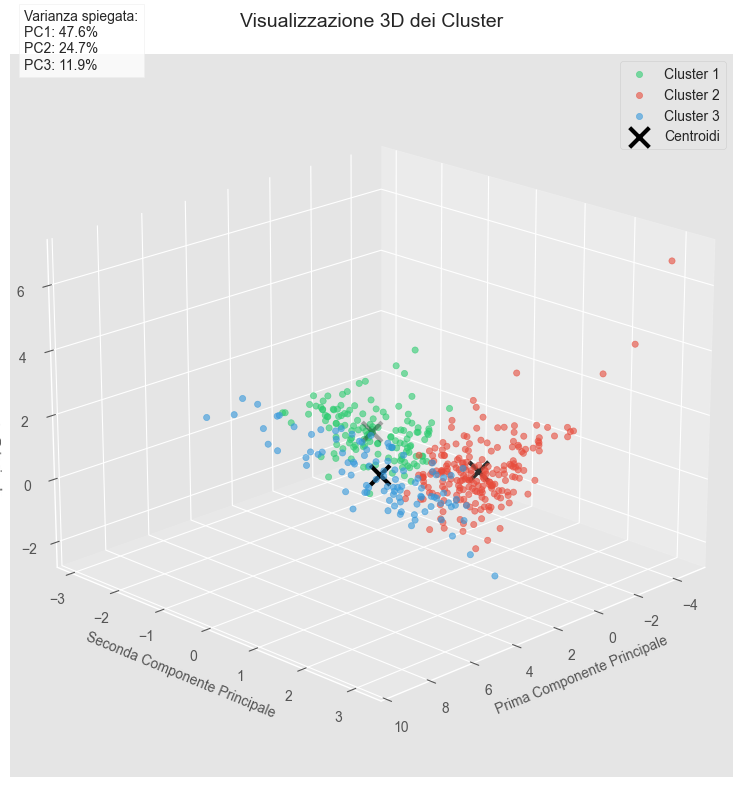

In [37]:
# 6. Visualizzazione 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D per ogni cluster
for i in range(k_optimal):
    cluster_mask = cluster_labels == i+1
    ax.scatter(X_pca[cluster_mask, 0], 
              X_pca[cluster_mask, 1], 
              X_pca[cluster_mask, 2],
              c=[cluster_colors[i]], 
              label=f'Cluster {i+1}',
              alpha=0.6)

# Centroidi
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
          c='black', marker='x', s=200, linewidth=3, 
          label='Centroidi')

# Personalizzazione grafico 3D
ax.set_title('Visualizzazione 3D dei Cluster', fontsize=14, pad=20)
ax.set_xlabel('Prima Componente Principale', fontsize=10)
ax.set_ylabel('Seconda Componente Principale', fontsize=10)
ax.set_zlabel('Terza Componente Principale', fontsize=10)
ax.legend()
ax.grid(True, alpha=0.3)

# Informazioni varianza spiegata
explained_variance = pca.explained_variance_ratio_[:3]
variance_text = f'Varianza spiegata:\nPC1: {explained_variance[0]:.1%}\nPC2: {explained_variance[1]:.1%}\nPC3: {explained_variance[2]:.1%}'
ax.text2D(0.02, 0.98, variance_text, transform=ax.transAxes, 
          bbox=dict(facecolor='white', alpha=0.8))

ax.view_init(elev=20, azim=45)
plt.tight_layout()
plt.show()

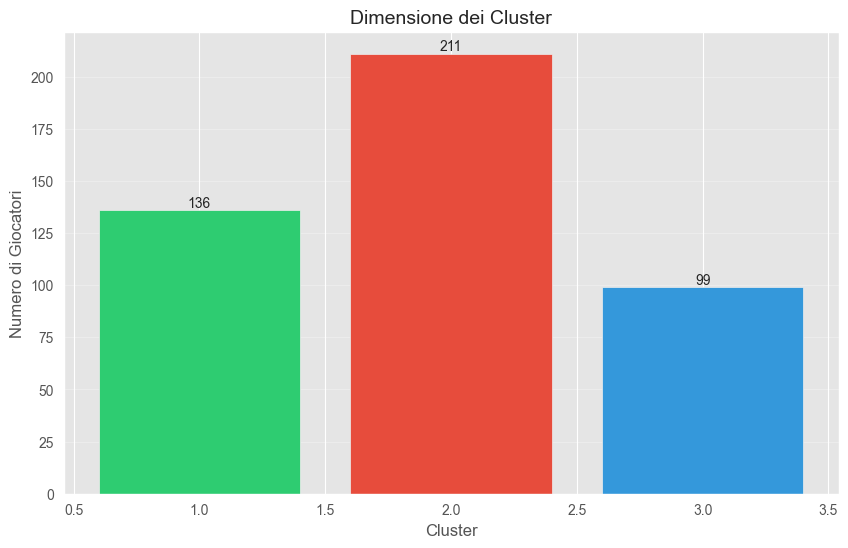

In [38]:
# 3. Grafico a barre delle dimensioni dei cluster
plt.figure(figsize=(10, 6))
cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()
bars = plt.bar(range(1, k_optimal + 1), cluster_sizes, color=cluster_colors)
plt.title('Dimensione dei Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Numero di Giocatori', fontsize=12)

# Etichette sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

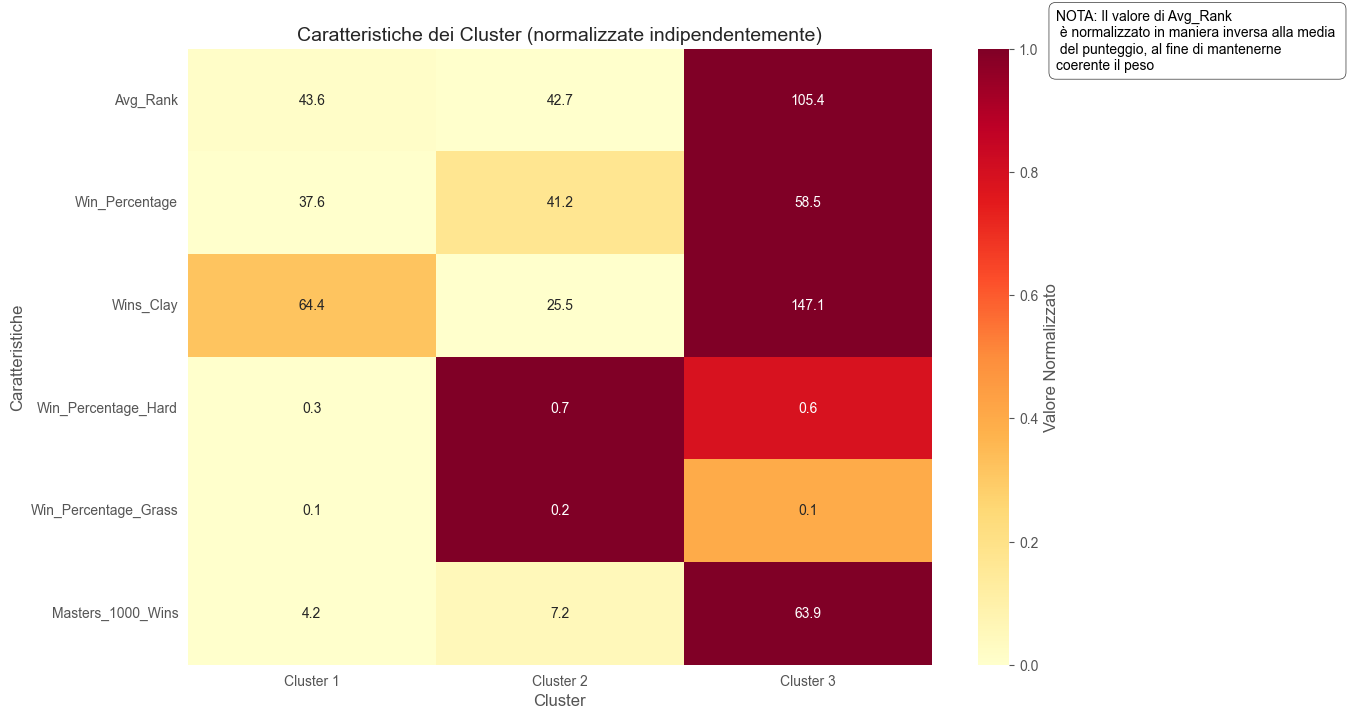

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cluster_stats = pd.DataFrame()
for i in range(k_optimal):
    cluster_stats[f'Cluster {i+1}'] = df_player_stats.loc[cluster_labels == i+1, features_for_pca].mean()

# Gestione della feature 'Avg_Rank' (inversione dei valori)
if 'Avg_Rank' in cluster_stats.index:
    max_rank = cluster_stats.loc['Avg_Rank'].max()
    min_rank = cluster_stats.loc['Avg_Rank'].min()
    cluster_stats.loc['Avg_Rank'] = max_rank - cluster_stats.loc['Avg_Rank'] + min_rank

# Normalizzazione indipendente per ciascuna caratteristica (riga)
cluster_stats_norm = cluster_stats.copy()
for feature in cluster_stats.index:
    cluster_stats_norm.loc[feature] = (cluster_stats.loc[feature] - cluster_stats.loc[feature].min()) / (cluster_stats.loc[feature].max() - cluster_stats.loc[feature].min())

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_stats_norm, annot=cluster_stats.round(1), fmt='.1f', 
            cmap='YlOrRd', cbar_kws={'label': 'Valore Normalizzato'})

# Titolo e etichette
plt.title('Caratteristiche dei Cluster (normalizzate indipendentemente)', fontsize=14)
plt.ylabel('Caratteristiche', fontsize=12)
plt.xlabel('Cluster', fontsize=12)

# Legenda personalizzata (testo in alto a destra)
plt.text(
    3.5,  # Coordinata x (regolare in base al grafico)
    0.2,    # Coordinata y (regolare in base al grafico)
    "NOTA: Il valore di Avg_Rank \n è normalizzato in maniera inversa alla media \n del punteggio, al fine di mantenerne \ncoerente il peso",
    fontsize=10,
    color='black',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5')
)

# Mostra il grafico
plt.show()

In [40]:
print("Colonne presenti in df_player_stats:")
print(df_player_stats.columns.tolist())

Colonne presenti in df_player_stats:
['Avg_Rank', 'Win_Percentage', 'Wins_Clay', 'Win_Percentage_Hard', 'Win_Percentage_Grass', 'Masters_1000_Wins']


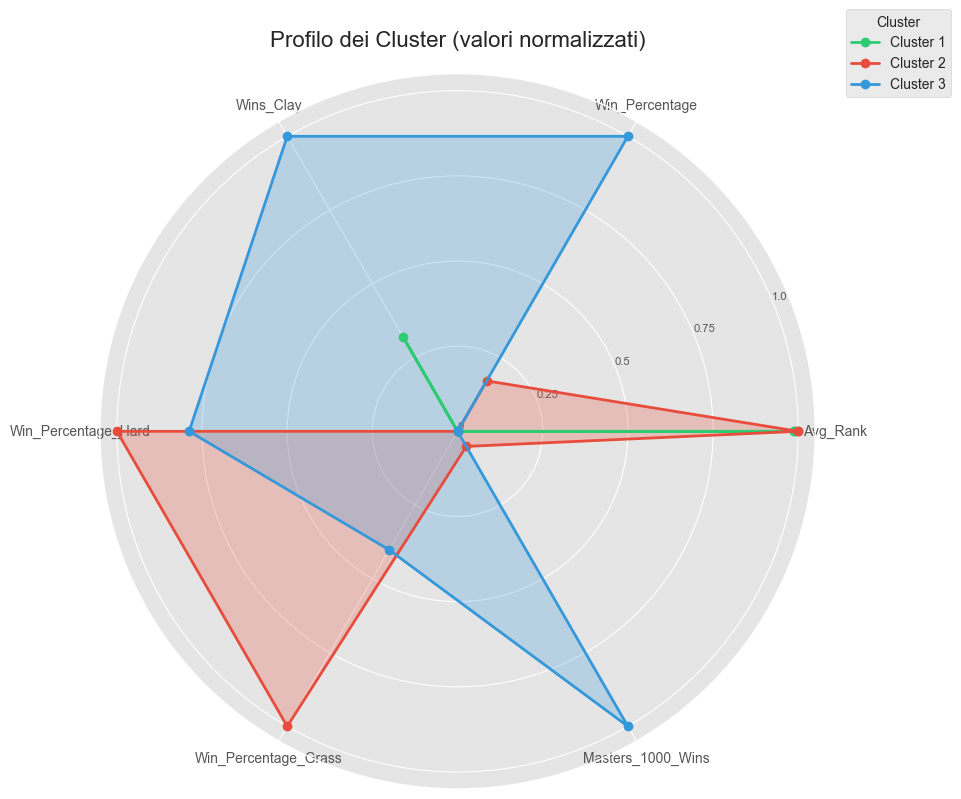

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Invertire i valori di 'Avg_Rank' (basso = meglio)
if 'Avg_Rank' in cluster_stats.index:
    max_rank = cluster_stats.loc['Avg_Rank'].max()
    min_rank = cluster_stats.loc['Avg_Rank'].min()
    cluster_stats.loc['Avg_Rank'] = max_rank - cluster_stats.loc['Avg_Rank'] + min_rank

# 2. Normalizzazione indipendente per ciascuna caratteristica
cluster_stats_norm = cluster_stats.copy()
for feature in cluster_stats.index:
    cluster_stats_norm.loc[feature] = (cluster_stats.loc[feature] - cluster_stats.loc[feature].min()) / (cluster_stats.loc[feature].max() - cluster_stats.loc[feature].min())

# 3. Trasporre i dati per ottenere i cluster come righe
stats_norm = cluster_stats_norm.T

# 4. Calcolo degli angoli per il grafico radar
angles = np.linspace(0, 2 * np.pi, len(stats_norm.columns), endpoint=False)  # Angoli equispaziati
angles = np.concatenate((angles, [angles[0]]))  # Chiusura del cerchio

# 5. Colori specifici per i cluster
cluster_colors = ['#2ecc71', '#e74c3c', '#3498db']  # Verde, Rosso, Blu

# 6. Creazione del grafico radar
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='polar')

# Aggiungere i dati per ogni cluster
for i in range(stats_norm.shape[0]):
    values = stats_norm.iloc[i].values  # Valori normalizzati del cluster
    values = np.concatenate((values, [values[0]]))  # Chiusura del cerchio
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {i+1}', color=cluster_colors[i % len(cluster_colors)])
    ax.fill(angles, values, alpha=0.25, color=cluster_colors[i % len(cluster_colors)])

# 7. Configurazione degli assi
ax.set_xticks(angles[:-1])
ax.set_xticklabels(stats_norm.columns, size=10, rotation=45)  # Etichette delle caratteristiche
ax.set_title('Profilo dei Cluster (valori normalizzati)', fontsize=16, pad=20)
ax.set_yticks(np.linspace(0, 1, 5))  # Divisioni per i valori normalizzati
ax.set_yticklabels(["0", "0.25", "0.5", "0.75", "1.0"], size=8)

# 8. Legenda
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10, title="Cluster")

# 9. Mostrare il grafico
plt.tight_layout()
plt.show()


Silhouette score medio: 0.2702


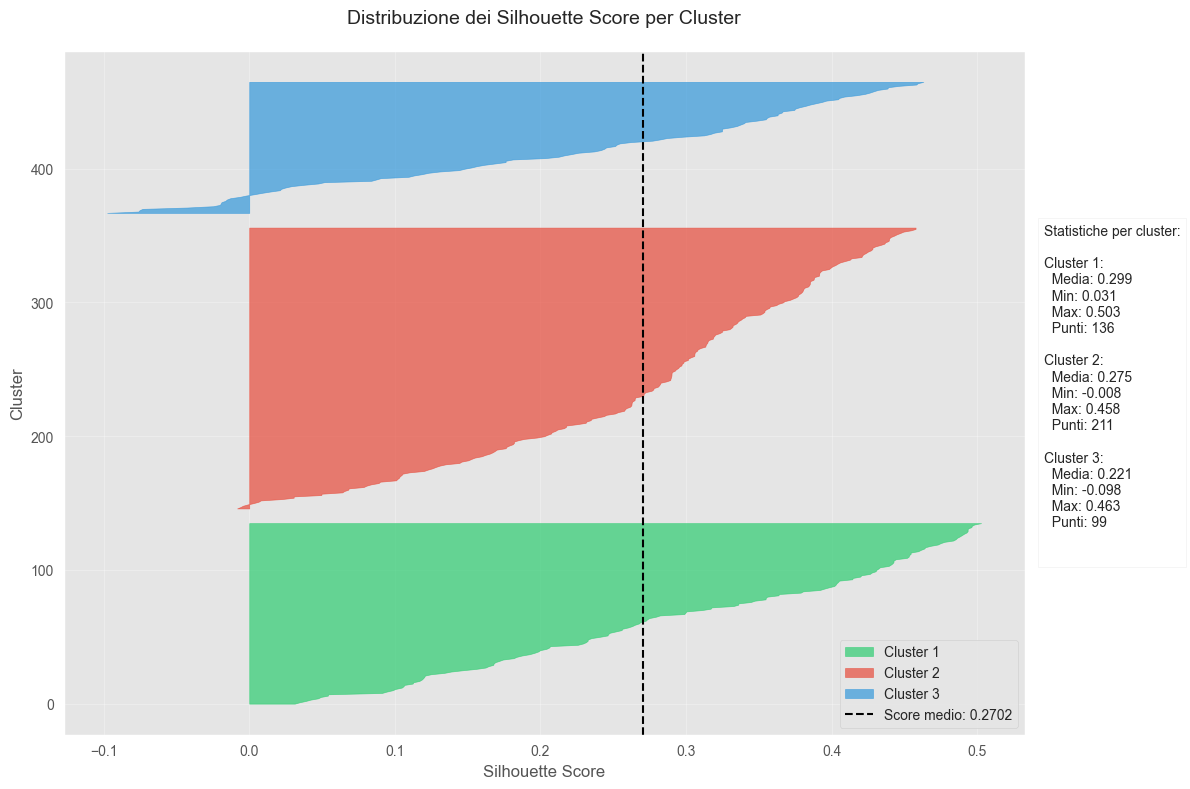


Dataset salvato come: tennis_players_clusters.csv


/var/folders/zt/9ggmn83106zfjymwl_r2kkdh0000gn/T/ipykernel_33086/1088117606.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player_stats['cluster'] = cluster_labels


In [42]:
# 7. Analisi Silhouette
from sklearn.metrics import silhouette_samples

# Calcolo Silhouette scores
silhouette_values = silhouette_samples(X_pca, cluster_labels)
silhouette_avg = np.mean(silhouette_values)
print(f"\nSilhouette score medio: {silhouette_avg:.4f}")

# Visualizzazione Silhouette
plt.figure(figsize=(12, 8))
y_lower, y_upper = 0, 0

for i in range(k_optimal):
    cluster_silhouette_values = silhouette_values[cluster_labels == i+1]
    cluster_silhouette_values.sort()
    y_upper = y_lower + len(cluster_silhouette_values)
    
    plt.fill_betweenx(np.arange(y_lower, y_upper), 
                      0, 
                      cluster_silhouette_values,
                      alpha=0.7,
                      color=cluster_colors[i],
                      label=f"Cluster {i+1}")
    
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, 
            color="black", 
            linestyle="--", 
            label=f"Score medio: {silhouette_avg:.4f}")

plt.title("Distribuzione dei Silhouette Score per Cluster", fontsize=14, pad=20)
plt.xlabel("Silhouette Score", fontsize=12)
plt.ylabel("Cluster", fontsize=12)

# Statistiche dettagliate
stats_text = "Statistiche per cluster:\n\n"
for i in range(k_optimal):
    cluster_scores = silhouette_values[cluster_labels == i+1]
    stats_text += f"Cluster {i+1}:\n"
    stats_text += f"  Media: {np.mean(cluster_scores):.3f}\n"
    stats_text += f"  Min: {np.min(cluster_scores):.3f}\n"
    stats_text += f"  Max: {np.max(cluster_scores):.3f}\n"
    stats_text += f"  Punti: {len(cluster_scores)}\n\n"

plt.text(1.02, 0.5, stats_text,
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='center')

plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Salviamo il DataFrame con i cluster
df_player_stats['cluster'] = cluster_labels
df_player_stats.to_csv('tennis_players_clusters.csv', index=False)
print("\nDataset salvato come: tennis_players_clusters.csv")

In [43]:
# Aggiungiamo la colonna del cluster al DataFrame originale
df_player_stats['cluster'] = cluster_labels

# Salviamo il DataFrame in un nuovo file CSV
output_filename = '../Datasets/New/atp_tennis_players_clustered_KMeans.csv'
df_player_stats.to_csv(output_filename, index=False)

print(f"\nDataset salvato come: {output_filename}")
print("\nPrime righe del nuovo dataset:")
print(df_player_stats.head())
print("\nDistribuzione dei cluster:")
print(df_player_stats['cluster'].value_counts().sort_index())


Dataset salvato come: ../Datasets/New/atp_tennis_players_clustered_KMeans.csv

Prime righe del nuovo dataset:
     Avg_Rank  Win_Percentage  Wins_Clay  Win_Percentage_Hard  \
1   47.969072       53.092784      113.0             0.417526   
4   12.513514       70.270270        0.0             0.891892   
11  93.027027       38.738739       57.0             0.635135   
13  22.163866       78.571429       87.0             0.521008   
15  35.994958       60.504202      364.0             0.347899   

    Win_Percentage_Grass  Masters_1000_Wins  cluster  
1               0.000000                1.0        1  
4               0.108108                0.0        3  
11              0.108108               10.0        2  
13              0.113445               62.0        3  
15              0.040336               55.0        3  

Distribuzione dei cluster:
cluster
1    136
2    211
3     99
Name: count, dtype: int64


/var/folders/zt/9ggmn83106zfjymwl_r2kkdh0000gn/T/ipykernel_33086/3071949921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player_stats['cluster'] = cluster_labels


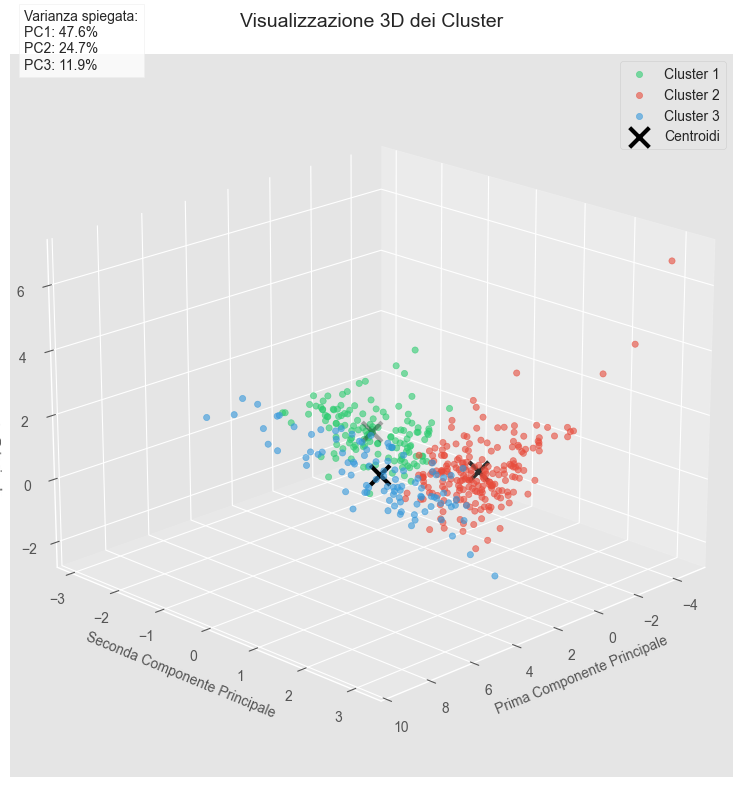

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# Creiamo il grafico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Definiamo i colori coerenti con i grafici precedenti
cluster_colors = ['#2ecc71', '#e74c3c', '#3498db']  # verde, rosso, blu

# Scatter plot 3D per ogni cluster
for i in range(k_optimal):
    cluster_mask = cluster_labels == i+1  # Modificato qui
    ax.scatter(X_pca[cluster_mask, 0], 
              X_pca[cluster_mask, 1], 
              X_pca[cluster_mask, 2],
              c=[cluster_colors[i]], 
              label=f'Cluster {i+1}',  # Modificato qui
              alpha=0.6)

# Plot dei centroidi
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
          c='black', marker='x', s=200, linewidth=3, 
          label='Centroidi')

# Personalizzazione del grafico
ax.set_title('Visualizzazione 3D dei Cluster', fontsize=14, pad=20)
ax.set_xlabel('Prima Componente Principale', fontsize=10)
ax.set_ylabel('Seconda Componente Principale', fontsize=10)
ax.set_zlabel('Terza Componente Principale', fontsize=10)

# Aggiungiamo la legenda
ax.legend()

# Aggiungiamo una griglia
ax.grid(True, alpha=0.3)

# Aggiungiamo informazioni sulla varianza spiegata
explained_variance = pca.explained_variance_ratio_[:3]
variance_text = f'Varianza spiegata:\nPC1: {explained_variance[0]:.1%}\nPC2: {explained_variance[1]:.1%}\nPC3: {explained_variance[2]:.1%}'
ax.text2D(0.02, 0.98, variance_text, transform=ax.transAxes, 
          bbox=dict(facecolor='white', alpha=0.8))

# Ruotiamo il grafico per una migliore visualizzazione
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

# Creiamo anche una versione interattiva con plotly (opzionale)
try:
    import plotly.express as px
    import plotly.graph_objects as go
    
    # Creiamo un DataFrame con le prime 3 componenti principali
    df_3d = pd.DataFrame(
        X_pca[:, :3], 
        columns=['PC1', 'PC2', 'PC3']
    )
    df_3d['Cluster'] = cluster_labels  # I cluster sono già numerati da 1 a 3
    
    # Creiamo il grafico 3D interattivo
    fig = go.Figure()
    
    # Aggiungiamo i punti per ogni cluster
    for i in range(k_optimal):
        cluster_data = df_3d[df_3d['Cluster'] == i+1]  # Modificato qui
        fig.add_trace(go.Scatter3d(
            x=cluster_data['PC1'],
            y=cluster_data['PC2'],
            z=cluster_data['PC3'],
            mode='markers',
            name=f'Cluster {i+1}',  # Modificato qui
            marker=dict(
                size=5,
                color=cluster_colors[i],
                opacity=0.6
            )
        ))
    
    # Aggiungiamo i centroidi
    fig.add_trace(go.Scatter3d(
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 2],
        mode='markers',
        name='Centroidi',
        marker=dict(
            size=8,
            color='black',
            symbol='x'
        )
    ))
    
    # Personalizziamo il layout
    fig.update_layout(
        title='Visualizzazione 3D Interattiva dei Cluster',
        scene=dict(
            xaxis_title='Prima Componente Principale',
            yaxis_title='Seconda Componente Principale',
            zaxis_title='Terza Componente Principale'
        ),
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01
        )
    )
    
    fig.show()
    
except ImportError:
    print("Per la visualizzazione interattiva, installa plotly con: pip install plotly")

In [45]:
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



Silhouette score medio: 0.2702


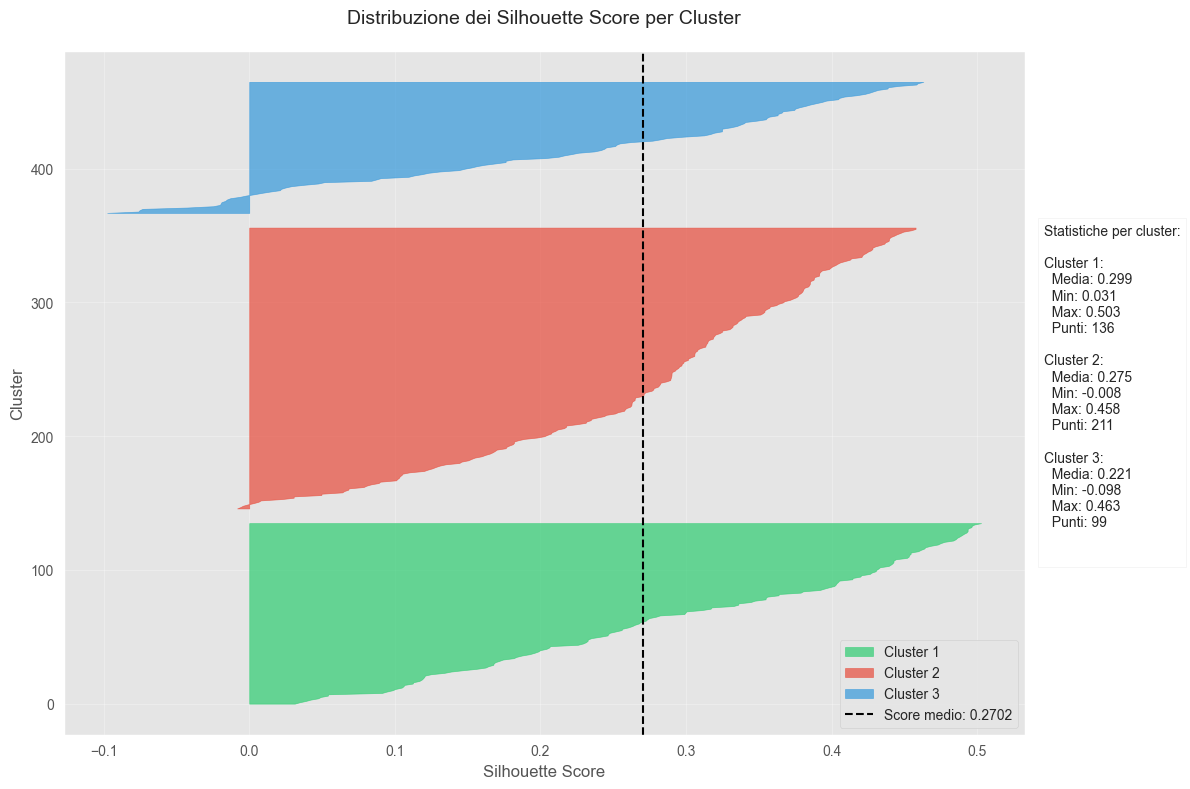


Analisi dettagliata dei Silhouette Score:
--------------------------------------------------

Cluster 1 (Colore: #2ecc71):
  Numero di punti: 136
  Score medio: 0.299
  Score minimo: 0.031
  Score massimo: 0.503
  Deviazione standard: 0.141

Cluster 2 (Colore: #e74c3c):
  Numero di punti: 211
  Score medio: 0.275
  Score minimo: -0.008
  Score massimo: 0.458
  Deviazione standard: 0.119

Cluster 3 (Colore: #3498db):
  Numero di punti: 99
  Score medio: 0.221
  Score minimo: -0.098
  Score massimo: 0.463
  Deviazione standard: 0.162


In [46]:
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt

# Calcoliamo i Silhouette scores per ogni punto
silhouette_values = silhouette_samples(X_pca, cluster_labels)

# Calcoliamo lo score medio
silhouette_avg = np.mean(silhouette_values)
print(f"\nSilhouette score medio: {silhouette_avg:.4f}")

# Creiamo il plot per la distribuzione dei Silhouette scores
plt.figure(figsize=(12, 8))

# Per ogni cluster, calcoliamo e plottiamo i Silhouette scores
y_lower, y_upper = 0, 0
for i in range(k_optimal):
    # Prendiamo i Silhouette scores per i punti nel cluster i+1
    cluster_silhouette_values = silhouette_values[cluster_labels == i+1]
    
    # Ordiniamo i Silhouette scores
    cluster_silhouette_values.sort()
    
    # Calcoliamo i limiti per ogni cluster
    y_upper = y_lower + len(cluster_silhouette_values)
    
    # Plottiamo i Silhouette scores per il cluster i+1
    plt.fill_betweenx(np.arange(y_lower, y_upper), 
                      0, 
                      cluster_silhouette_values,
                      alpha=0.7,
                      color=cluster_colors[i],
                      label=f"Cluster {i+1}")
    
    # Aggiorniamo il limite inferiore per il prossimo cluster
    y_lower = y_upper + 10

# Aggiungiamo una linea verticale per lo score medio
plt.axvline(x=silhouette_avg, 
            color="black", 
            linestyle="--", 
            label=f"Score medio: {silhouette_avg:.4f}")

# Personalizziamo il grafico
plt.title("Distribuzione dei Silhouette Score per Cluster", fontsize=14, pad=20)
plt.xlabel("Silhouette Score", fontsize=12)
plt.ylabel("Cluster", fontsize=12)

# Aggiungiamo statistiche dettagliate in un box
stats_text = "Statistiche per cluster:\n\n"
for i in range(k_optimal):
    cluster_scores = silhouette_values[cluster_labels == i+1]
    stats_text += f"Cluster {i+1}:\n"
    stats_text += f"  Media: {np.mean(cluster_scores):.3f}\n"
    stats_text += f"  Min: {np.min(cluster_scores):.3f}\n"
    stats_text += f"  Max: {np.max(cluster_scores):.3f}\n"
    stats_text += f"  Punti: {len(cluster_scores)}\n\n"

plt.text(1.02, 0.5, stats_text,
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='center')

plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Stampa analisi dettagliata
print("\nAnalisi dettagliata dei Silhouette Score:")
print("-" * 50)
for i in range(k_optimal):
    cluster_scores = silhouette_values[cluster_labels == i+1]
    print(f"\nCluster {i+1} (Colore: {cluster_colors[i]}):")
    print(f"  Numero di punti: {len(cluster_scores)}")
    print(f"  Score medio: {np.mean(cluster_scores):.3f}")
    print(f"  Score minimo: {np.min(cluster_scores):.3f}")
    print(f"  Score massimo: {np.max(cluster_scores):.3f}")
    print(f"  Deviazione standard: {np.std(cluster_scores):.3f}")

Anteprima del DataFrame con i risultati del clustering:
    Avg_Rank  Win_Percentage  Wins_Clay  Win_Percentage_Hard  \
0  47.969072       53.092784      113.0             0.417526   
1  12.513514       70.270270        0.0             0.891892   
2  93.027027       38.738739       57.0             0.635135   
3  22.163866       78.571429       87.0             0.521008   
4  35.994958       60.504202      364.0             0.347899   

   Win_Percentage_Grass  Masters_1000_Wins  cluster       PC1       PC2  \
0              0.000000                1.0        1  1.150963 -1.553348   
1              0.108108                0.0        3  1.472271  2.098600   
2              0.108108               10.0        2 -0.374579  0.209303   
3              0.113445               62.0        3  3.040762  0.588463   
4              0.040336               55.0        3  3.987877 -2.321940   

        PC3  Cluster  
0 -1.103343        0  
1 -2.152773        2  
2 -0.309359        1  
3 -0.242417     

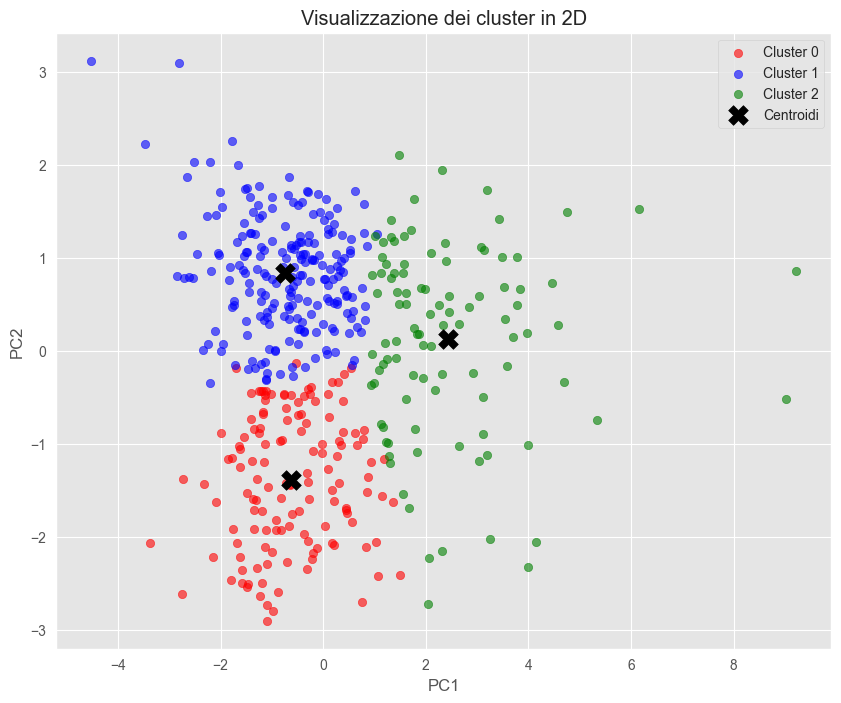

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponiamo che queste variabili siano già definite:
# - df_player_stats: il tuo DataFrame originale
# - scores_pca: il risultato del PCA (riduzione delle dimensioni)
# - kmeans: modello KMeans già applicato

# Aggiungere le etichette dei cluster al DataFrame PCA
df_pca_scores = pd.DataFrame(scores_pca, columns=['PC1', 'PC2', 'PC3'])  # Usando le prime 2 componenti principali
df_pca_scores['Cluster'] = kmeans.labels_  # Etichette dei cluster

# Concatenare il DataFrame originale con le componenti PCA e le etichette dei cluster
df_segm_pca_kmeans = pd.concat([df_player_stats.reset_index(drop=True), df_pca_scores], axis=1)

# Verifica del DataFrame risultante
print("Anteprima del DataFrame con i risultati del clustering:")
print(df_segm_pca_kmeans.head())

# 2. Visualizzare i risultati del clustering in 2D
def view_kmeans_results_2d(data, pca_scores, kmeans):
    plt.figure(figsize=(10, 8))
    
    # Colori distinti per ciascun cluster
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'pink']
    
    for cluster in range(kmeans.n_clusters):
        cluster_points = pca_scores[kmeans.labels_ == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    c=colors[cluster % len(colors)], 
                    label=f'Cluster {cluster}', alpha=0.6)
    
    # Centroidi
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, c='black', label='Centroidi', marker='X')
    
    plt.title('Visualizzazione dei cluster in 2D')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualizzazione
view_kmeans_results_2d(df_segm_pca_kmeans, scores_pca, kmeans)

## DBSCAN




Calcolo delle combinazioni...
Calcolando DBSCAN per eps=0.10, min_samples=3...
  Escluso: numero di cluster <= 1.
Calcolando DBSCAN per eps=0.10, min_samples=4...
  Escluso: numero di cluster <= 1.
Calcolando DBSCAN per eps=0.10, min_samples=5...
  Escluso: numero di cluster <= 1.
Calcolando DBSCAN per eps=0.10, min_samples=6...
  Escluso: numero di cluster <= 1.
Calcolando DBSCAN per eps=0.10, min_samples=7...
  Escluso: numero di cluster <= 1.
Calcolando DBSCAN per eps=0.10, min_samples=8...
  Escluso: numero di cluster <= 1.
Calcolando DBSCAN per eps=0.10, min_samples=9...
  Escluso: numero di cluster <= 1.
Calcolando DBSCAN per eps=0.10, min_samples=10...
  Escluso: numero di cluster <= 1.
Calcolando DBSCAN per eps=0.10, min_samples=11...
  Escluso: numero di cluster <= 1.
Calcolando DBSCAN per eps=0.10, min_samples=12...
  Escluso: numero di cluster <= 1.
Calcolando DBSCAN per eps=0.10, min_samples=13...
  Escluso: numero di cluster <= 1.
Calcolando DBSCAN per eps=0.10, min_sampl

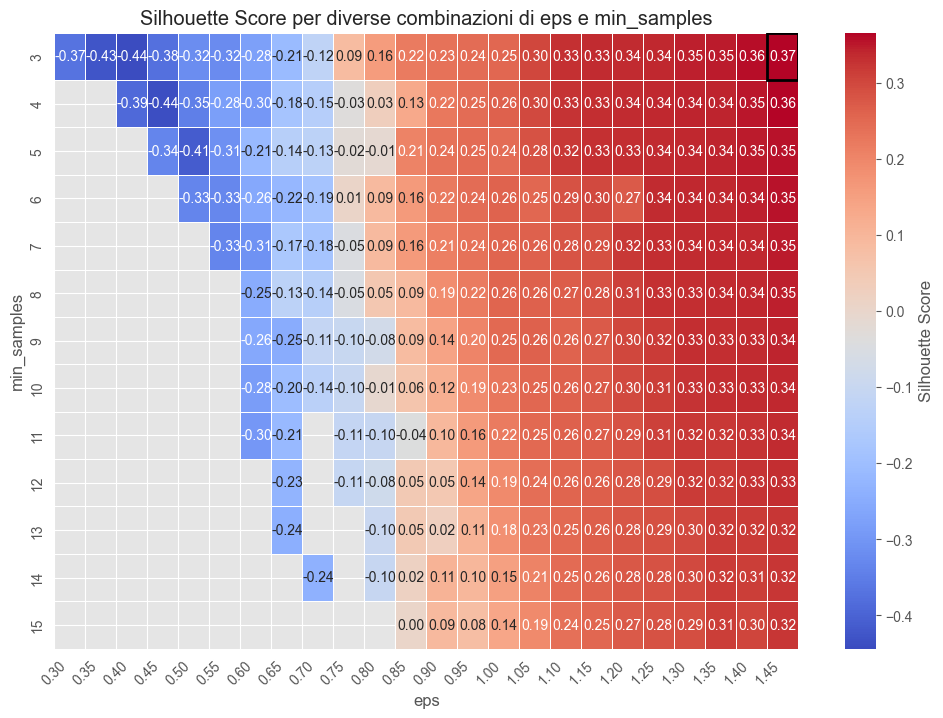

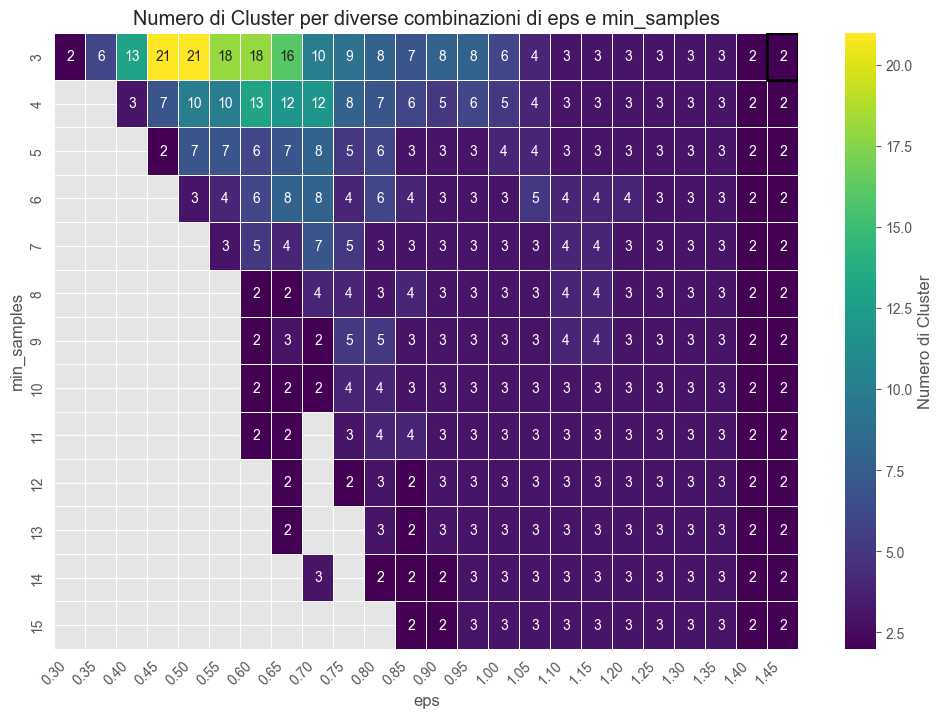

In [48]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Normalizzazione dei dati
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_player_stats)  # Dataset con le feature

# Intervalli di valori per eps e min_samples
eps_values = np.arange(0.1, 3.0, 0.05)  # Intervallo più fine per eps (da 0.05 a 3.0)
min_samples_values = range(3, 16)       # Esplora min_samples da 3 a 15

# Risultati della grid search
results = []

print("\nCalcolo delle combinazioni...")
for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"Calcolando DBSCAN per eps={eps:.2f}, min_samples={min_samples}...")
        
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_normalized)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        if n_clusters <= 1:
            print("  Escluso: numero di cluster <= 1.")
            continue
        
        silhouette_avg = silhouette_score(df_normalized, labels)
        n_noise = list(labels).count(-1)
        
        results.append({
            'eps': round(eps, 2),  # Tronca eps alla seconda cifra decimale
            'min_samples': min_samples,
            'silhouette_score': silhouette_avg,
            'n_clusters': n_clusters,
            'n_noise': n_noise
        })
        print(f"  Risultato: {n_clusters} cluster, {n_noise} punti rumorosi, silhouette={silhouette_avg:.3f}")

# Converti i risultati in un DataFrame
results_df = pd.DataFrame(results)

# Ordina per silhouette score decrescente
results_df = results_df.sort_values(by='silhouette_score', ascending=False)

# Identifica i migliori parametri
best_params = results_df.iloc[0]  # Prima riga corrisponde ai migliori parametri
best_eps = best_params['eps']
best_min_samples = best_params['min_samples']

print("\nMigliori parametri trovati:")
print(results_df.head(10))
print(f"\nMigliori parametri selezionati: eps={best_eps}, min_samples={best_min_samples}")

# Heatmap del silhouette score
pivot_table = results_df.pivot_table(index="min_samples", columns="eps", values="silhouette_score")
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Silhouette Score'},
    linewidths=0.5,  # Contorno nero tra tutte le caselle
)

# Evidenzia i migliori parametri nella heatmap
best_x = list(pivot_table.columns).index(best_eps)
best_y = list(pivot_table.index).index(best_min_samples)
plt.gca().add_patch(plt.Rectangle((best_x, best_y), 1, 1, fill=False, edgecolor='black', linewidth=2))

plt.title("Silhouette Score per diverse combinazioni di eps e min_samples")
plt.xlabel("eps")
plt.ylabel("min_samples")
plt.xticks(ticks=np.arange(len(pivot_table.columns)), labels=[f"{col:.2f}" for col in pivot_table.columns], rotation=45)
plt.show()

# Heatmap del numero di cluster
pivot_table_clusters = results_df.pivot_table(index="min_samples", columns="eps", values="n_clusters")
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table_clusters,
    annot=True,
    fmt=".0f",
    cmap="viridis",
    cbar_kws={'label': 'Numero di Cluster'},
    linewidths=0.5,  # Contorno nero tra tutte le caselle
)

# Evidenzia i migliori parametri nella heatmap
plt.gca().add_patch(plt.Rectangle((best_x, best_y), 1, 1, fill=False, edgecolor='black', linewidth=2))

plt.title("Numero di Cluster per diverse combinazioni di eps e min_samples")
plt.xlabel("eps")
plt.ylabel("min_samples")
plt.xticks(ticks=np.arange(len(pivot_table_clusters.columns)), labels=[f"{col:.2f}" for col in pivot_table_clusters.columns], rotation=45)
plt.show()

/var/folders/zt/9ggmn83106zfjymwl_r2kkdh0000gn/T/ipykernel_33086/1566939896.py:37: UserWarning:

You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



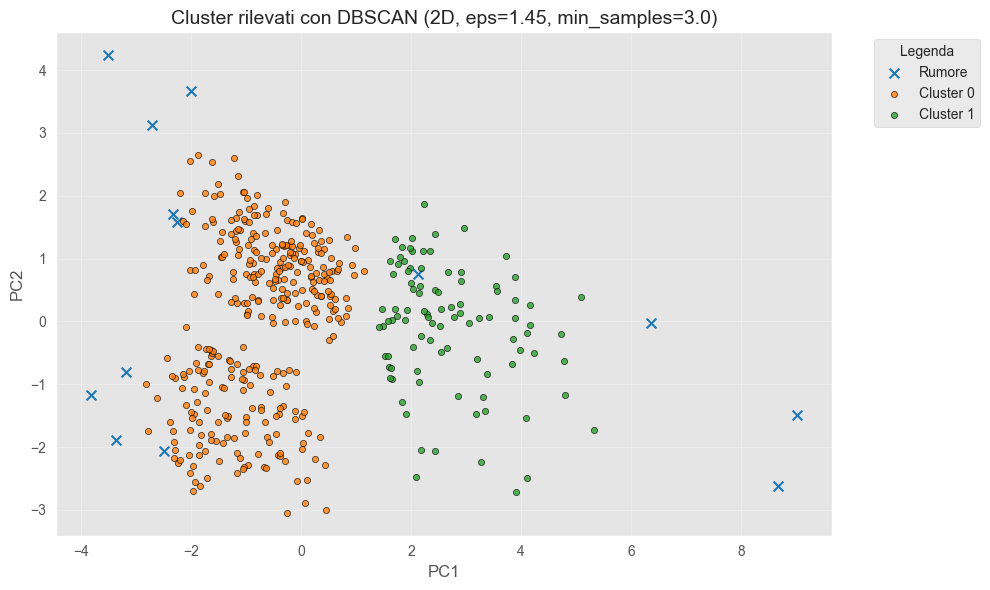

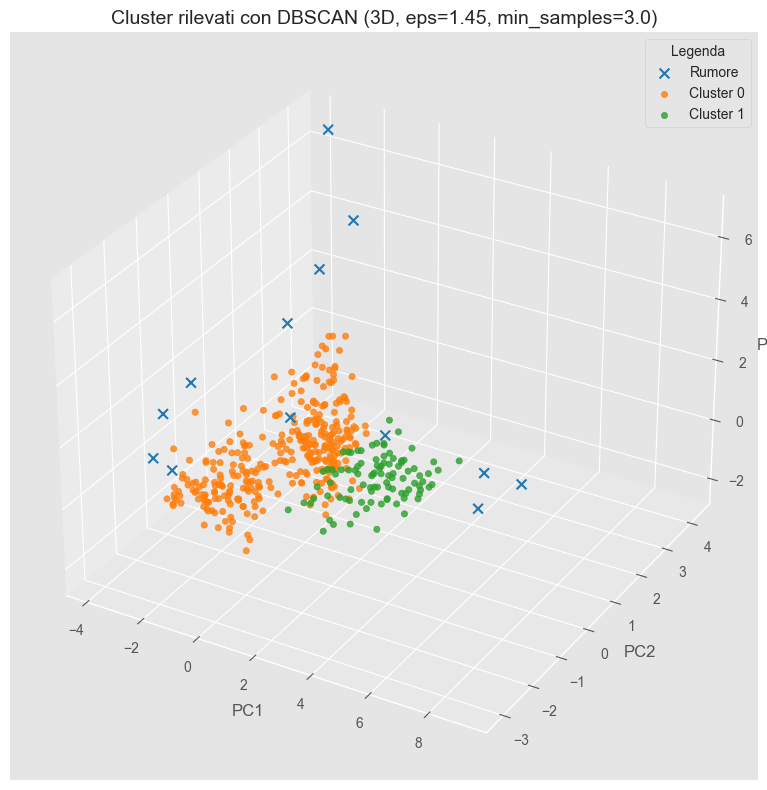

In [49]:
from matplotlib import cm
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Applica DBSCAN con i migliori parametri
dbscan_best = DBSCAN(eps=best_eps, min_samples=int(best_min_samples))
best_labels = dbscan_best.fit_predict(df_normalized)

# Riduzione a 2 dimensioni e 3 dimensioni con PCA
pca_2d = PCA(n_components=2)
pca_scores_2d = pca_2d.fit_transform(df_normalized)

pca_3d = PCA(n_components=3)
pca_scores_3d = pca_3d.fit_transform(df_normalized)

# Palette di colori per i cluster
unique_labels = np.unique(best_labels)
n_clusters = len(unique_labels)
colors = sns.color_palette("tab10", n_clusters)

# **Grafico 2D**
plt.figure(figsize=(10, 6))
for label, color in zip(unique_labels, colors):
    if label == -1:  # Punti rumorosi
        cluster_label = "Rumore"
        marker = 'x'
        alpha = 1.0  # Rumore più evidente
        size = 50    # Punti rumorosi più grandi
        edgecolor = 'red'  # Contorno rosso per il rumore
    else:
        cluster_label = f"Cluster {label}"
        marker = 'o'
        alpha = 0.8
        size = 20
        edgecolor = 'k'  # Contorno nero per i cluster

    plt.scatter(
        pca_scores_2d[best_labels == label, 0],
        pca_scores_2d[best_labels == label, 1],
        c=[color],
        label=cluster_label,
        marker=marker,
        alpha=alpha,
        s=size,
        edgecolor=edgecolor
    )

plt.title(f"Cluster rilevati con DBSCAN (2D, eps={best_eps}, min_samples={best_min_samples})", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Legenda", loc="upper right", bbox_to_anchor=(1.2, 1.0))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# **Grafico 3D**
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for label, color in zip(unique_labels, colors):
    if label == -1:  # Punti rumorosi
        cluster_label = "Rumore"
        marker = 'x'
        alpha = 1.0  # Rumore più evidente
        size = 50    # Punti rumorosi più grandi
    else:
        cluster_label = f"Cluster {label}"
        marker = 'o'
        alpha = 0.8
        size = 20

    ax.scatter(
        pca_scores_3d[best_labels == label, 0],
        pca_scores_3d[best_labels == label, 1],
        pca_scores_3d[best_labels == label, 2],
        c=[color],
        label=cluster_label,
        marker=marker,
        alpha=alpha,
        s=size
    )

ax.set_title(f"Cluster rilevati con DBSCAN (3D, eps={best_eps}, min_samples={best_min_samples})", fontsize=14)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend(title="Legenda", loc="best")
plt.tight_layout()
plt.show()

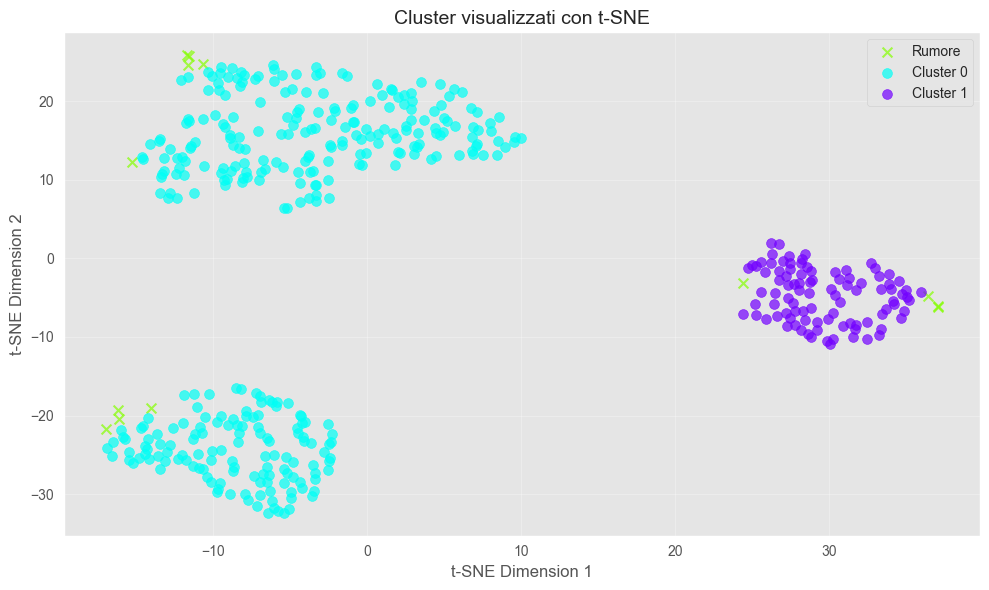

In [50]:
from sklearn.manifold import TSNE

# Applica t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_scores = tsne.fit_transform(df_normalized)

# Visualizza i risultati
plt.figure(figsize=(10, 6))
unique_labels = np.unique(best_labels)
colors = sns.color_palette("hsv", len(unique_labels))

for label, color in zip(unique_labels, colors):
    if label == -1:
        plt.scatter(tsne_scores[best_labels == label, 0], tsne_scores[best_labels == label, 1],
                    c=[color], label="Rumore", marker="x", s=50, alpha=0.7)
    else:
        plt.scatter(tsne_scores[best_labels == label, 0], tsne_scores[best_labels == label, 1],
                    c=[color], label=f"Cluster {label}", marker="o", s=50, alpha=0.7)

plt.title("Cluster visualizzati con t-SNE", fontsize=14)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/Users/andreavisi/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/andreavisi/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



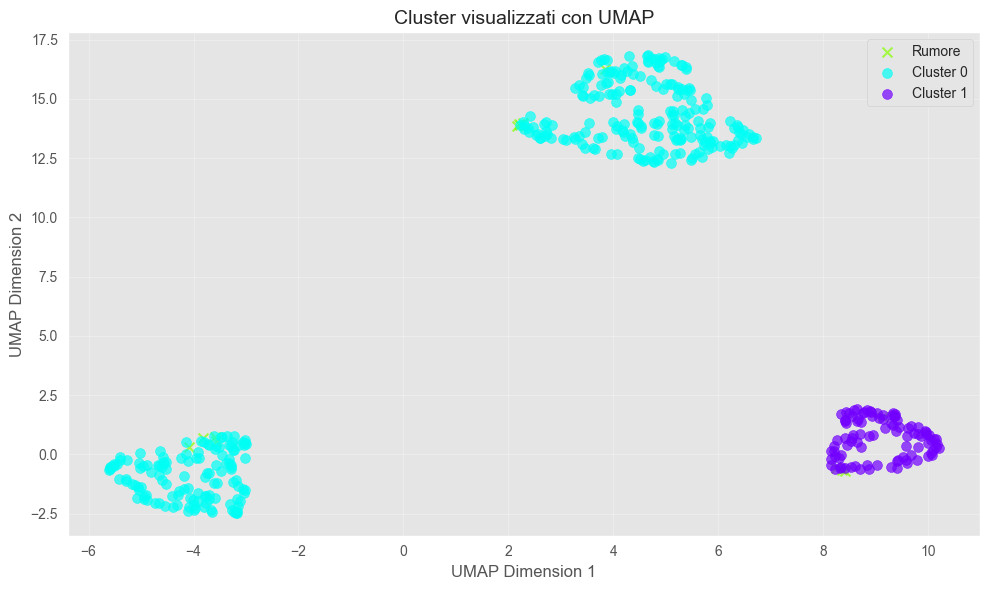

In [61]:
import umap

# Applica UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_scores = umap_reducer.fit_transform(df_normalized)

# Visualizza i risultati
plt.figure(figsize=(10, 6))
for label, color in zip(unique_labels, colors):
    if label == -1:
        plt.scatter(umap_scores[best_labels == label, 0], umap_scores[best_labels == label, 1],
                    c=[color], label="Rumore", marker="x", s=50, alpha=0.7)
    else:
        plt.scatter(umap_scores[best_labels == label, 0], umap_scores[best_labels == label, 1],
                    c=[color], label=f"Cluster {label}", marker="o", s=50, alpha=0.7)

plt.title("Cluster visualizzati con UMAP", fontsize=14)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [63]:
import plotly.express as px

# Crea un DataFrame con le componenti PCA e i cluster
df_plot = pd.DataFrame(pca_scores_2d, columns=["PC1", "PC2"])
df_plot["Cluster"] = best_labels

# Colora i punti in base al cluster
fig = px.scatter(df_plot, x="PC1", y="PC2", color="Cluster", 
                 title="Cluster visualizzati con PCA (interattivo)",
                 color_discrete_sequence=px.colors.qualitative.Set2)

# Mostra il grafico
fig.show()

In [64]:
# Aggiungi una terza dimensione (PCA)
df_plot_3d = pd.DataFrame(pca_scores_3d, columns=["PC1", "PC2", "PC3"])
df_plot_3d["Cluster"] = best_labels

fig_3d = px.scatter_3d(df_plot_3d, x="PC1", y="PC2", z="PC3", color="Cluster", 
                       title="Cluster visualizzati in 3D (interattivo)",
                       color_discrete_sequence=px.colors.qualitative.Set2)

# Mostra il grafico
fig_3d.show()

## HDBSCAN

/Users/andreavisi/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/andreavisi/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/var/folders/zt/9ggmn83106zfjymwl_r2kkdh0000gn/T/ipykernel_33086/3866828255.py:34: UserWarning:

You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



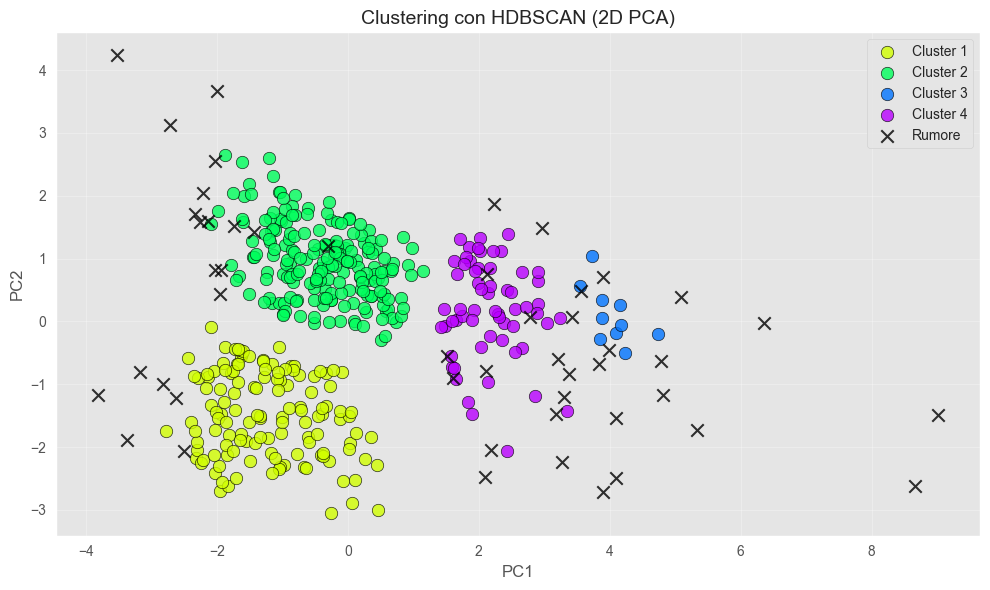

/var/folders/zt/9ggmn83106zfjymwl_r2kkdh0000gn/T/ipykernel_33086/3866828255.py:67: UserWarning:

You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



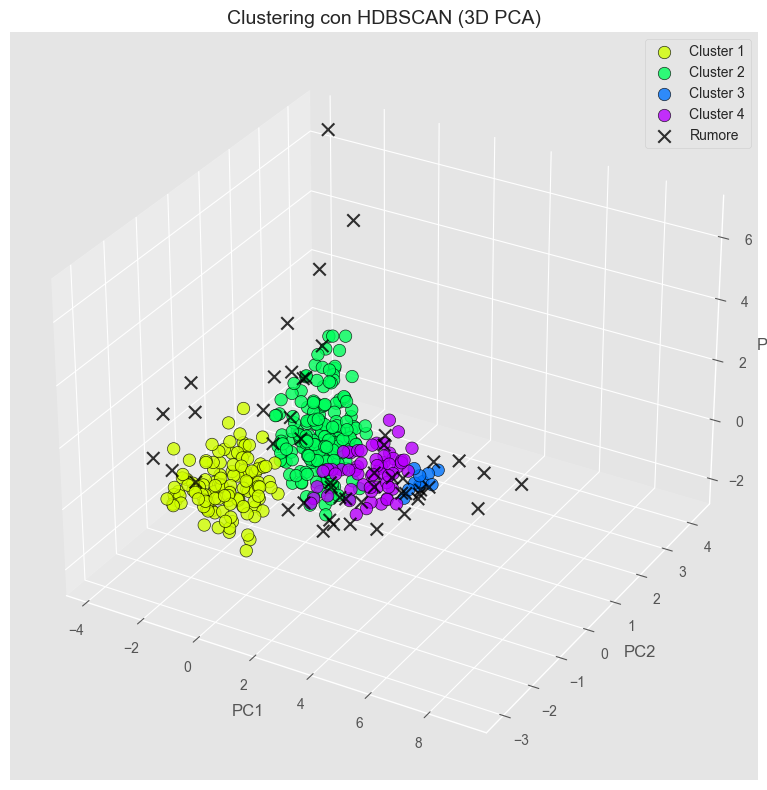

In [73]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import hdbscan

# Applica HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, metric='euclidean')
labels_hdbscan = hdbscan_clusterer.fit_predict(df_normalized)

# Aggiorna i cluster: da 0→1, rumore (-1) rimane invariato
labels_hdbscan = np.where(labels_hdbscan != -1, labels_hdbscan + 1, -1)

# PCA per ridurre le dimensioni a 2D e 3D
pca = PCA(n_components=3)
pca_scores_hdbscan = pca.fit_transform(df_normalized)

# Visualizzazione 2D
plt.figure(figsize=(10, 6))
unique_labels = set(labels_hdbscan)
colors = sns.color_palette("hsv", len(unique_labels) - 1)  # Escludi il rumore

for label in unique_labels:
    if label == -1:  # Rumore
        cluster_label = "Rumore"
        marker = 'x'
        color = 'black'
    else:
        cluster_label = f"Cluster {label}"
        marker = 'o'
        color = colors[label - 1]  # Colori partono da 0 per i cluster validi

    plt.scatter(
        pca_scores_hdbscan[labels_hdbscan == label, 0],
        pca_scores_hdbscan[labels_hdbscan == label, 1],
        c=[color],
        edgecolor='k',  # Contorno nero
        label=cluster_label,
        marker=marker,
        s=80,  # Dimensione dei punti
        alpha=0.8
    )

plt.title("Clustering con HDBSCAN (2D PCA)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="best", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Visualizzazione 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for label in unique_labels:
    if label == -1:  # Rumore
        cluster_label = "Rumore"
        marker = 'x'
        color = 'black'
    else:
        cluster_label = f"Cluster {label}"
        marker = 'o'
        color = colors[label - 1]

    ax.scatter(
        pca_scores_hdbscan[labels_hdbscan == label, 0],
        pca_scores_hdbscan[labels_hdbscan == label, 1],
        pca_scores_hdbscan[labels_hdbscan == label, 2],
        c=[color],
        edgecolor='k',
        label=cluster_label,
        marker=marker,
        s=80,
        alpha=0.8
    )

ax.set_title("Clustering con HDBSCAN (3D PCA)", fontsize=14)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend(loc="best", fontsize=10)
plt.tight_layout()
plt.show()

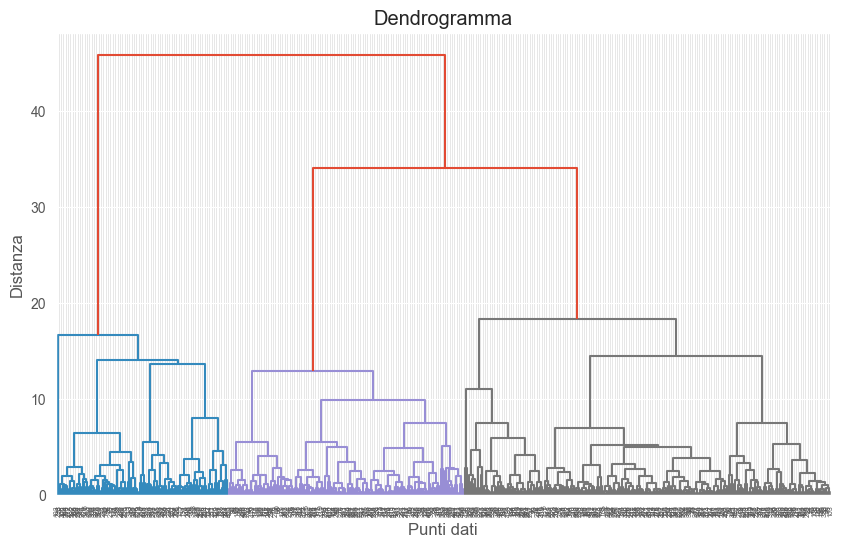

In [74]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg_clustering.fit_predict(df_normalized)

# Visualizzazione dendrogramma
linkage_matrix = linkage(df_normalized, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogramma")
plt.xlabel("Punti dati")
plt.ylabel("Distanza")
plt.show()

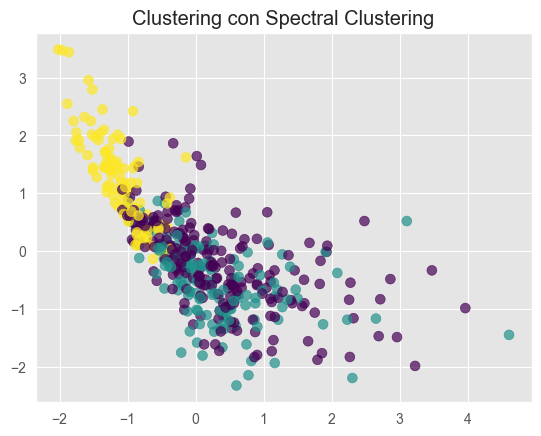

In [75]:
from sklearn.cluster import SpectralClustering

# Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
labels_spectral = spectral.fit_predict(df_normalized)

# Visualizzazione
plt.scatter(df_normalized[:, 0], df_normalized[:, 1], c=labels_spectral, cmap='viridis', s=50, alpha=0.7)
plt.title("Clustering con Spectral Clustering")
plt.show()

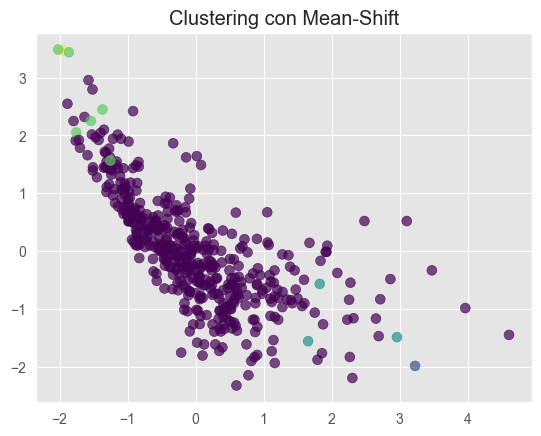

In [76]:
from sklearn.cluster import MeanShift

# Clustering
mean_shift = MeanShift()
labels_mean_shift = mean_shift.fit_predict(df_normalized)

# Visualizzazione
plt.scatter(df_normalized[:, 0], df_normalized[:, 1], c=labels_mean_shift, cmap='viridis', s=50, alpha=0.7)
plt.title("Clustering con Mean-Shift")
plt.show()

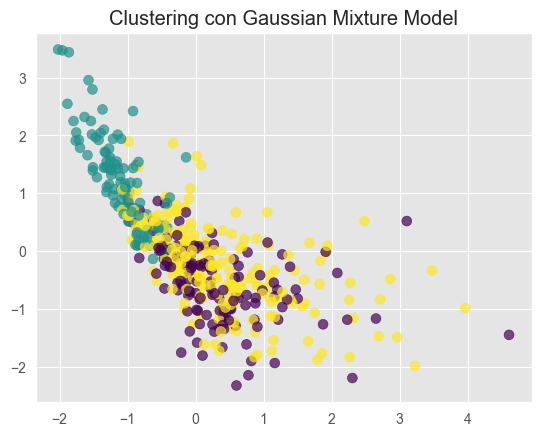

In [77]:
from sklearn.mixture import GaussianMixture

# Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(df_normalized)

# Visualizzazione
plt.scatter(df_normalized[:, 0], df_normalized[:, 1], c=labels_gmm, cmap='viridis', s=50, alpha=0.7)
plt.title("Clustering con Gaussian Mixture Model")
plt.show()

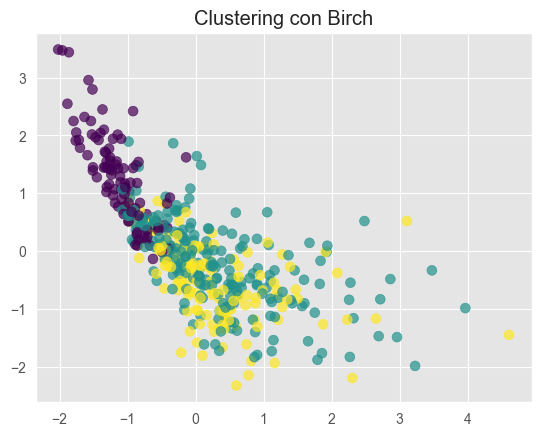

In [78]:
from sklearn.cluster import Birch

# Clustering
birch = Birch(n_clusters=3)
labels_birch = birch.fit_predict(df_normalized)

# Visualizzazione
plt.scatter(df_normalized[:, 0], df_normalized[:, 1], c=labels_birch, cmap='viridis', s=50, alpha=0.7)
plt.title("Clustering con Birch")
plt.show()

In [79]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Esempio di confronto
algorithms = {
    "K-Means": KMeans(n_clusters=3, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "Spectral": SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42),
    "Mean-Shift": MeanShift(),
    "GMM": GaussianMixture(n_components=3, random_state=42),
    "Birch": Birch(n_clusters=3)
}

results = []

for name, algo in algorithms.items():
    labels = algo.fit_predict(df_normalized)
    if len(set(labels)) > 1:
        silhouette = silhouette_score(df_normalized, labels)
        calinski = calinski_harabasz_score(df_normalized, labels)
        davies = davies_bouldin_score(df_normalized, labels)
        results.append((name, silhouette, calinski, davies))

results_df = pd.DataFrame(results, columns=["Algorithm", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])
print(results_df)

       Algorithm  Silhouette  Calinski-Harabasz  Davies-Bouldin
0        K-Means    0.354794         240.804408        1.082114
1  Agglomerative    0.354794         240.804408        1.082114
2       Spectral    0.354794         240.804408        1.082114
3     Mean-Shift    0.354115          21.913898        0.604153
4            GMM    0.354794         240.804408        1.082114
5          Birch    0.354794         240.804408        1.082114
